In [1]:
!nvidia-smi

Tue Jul  2 02:07:01 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.256.02   Driver Version: 470.256.02   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:01:00.0 Off |                  N/A |
| N/A   41C    P8     3W /  N/A |     12MiB /  3914MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## **Food Mold Detection**

#### **Setup Dependencies**

In [5]:
!pip install comet_ml

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com

[notice] A new release of pip is available: 23.1.2 -> 24.1.1
[notice] To update, run: pip install --upgrade pip


In [1]:
#!git clone https://github.com/ultralytics/yolov5  # clone
#%cd yolov5
#%pip install -qr requirements.txt comet_ml  # install

import pandas as pd
import torch
import utils
import tqdm
import cv2
import os
import torch
import utils
display = utils.notebook_init()  # checks

fatal: cannot change to '/home/miko/Desktop/Food': No such file or directory
YOLOv5 🚀 2024-6-27 Python-3.8.0 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce GTX 1650, 3914MiB)


Setup complete ✅ (16 CPUs, 13.5 GB RAM, 240.3/248.9 GB disk)


#### **EDA**

In [2]:
def get_bbox_coord(img_w, img_h, x_c, y_c, width, height):
    # calculate the coordinates of bounding box
    x = x_c * img_w
    y = y_c * img_h
    w = (width * img_w)
    h = (height * img_h)

    # calculate the coordinates of bounding box
    # xmin = int(x_center_pixel - half_w)
    # ymin = int(y_center_pixel - half_h)
    # xmax = int(x_center_pixel + half_w)
    # ymax = int(y_center_pixel + half_h)

    return x, y, w, h

def aspect_ratio(img_w, img_h, width, height):
    # calculate the coordinates of bounding box
    box_w = (width * img_w)
    box_h = (height * img_h)

    aspect = (box_h/box_w)

    return aspect 


def get_coord(line):
    # list of strings
    coord_st = line.split(" ")
    coords = [float(c) for c in coord_st]

    return coords

# obtain class names
config_path = os.path.join(os.getcwd(),"data/food_mold.yaml")
print(config_path)

import yaml

with open(config_path) as f:
    dict = yaml.load(f, Loader=yaml.FullLoader)
    
class_names = dict["names"]
print(f"Class names - {class_names}")

/home/miko/Desktop/Food Recognition and Mold Detection project/yolov5/data/food_mold.yaml
Class names - ['bread_mold']


In [8]:
master_df = pd.DataFrame(columns = ["Class", "Aspect ratio", "Image", "x", "y", "w", "h","img_w", "img_h"])

src = os.path.join(os.getcwd(),"data")

img_path = os.path.join(src, "Bread Mold Detection/images/train")
label_path = os.path.join(src, "Bread Mold Detection/labels/train")

df_id = 0

for img in os.listdir(img_path):

    img_h, img_w, _ = cv2.imread(os.path.join(img_path, img)).shape
    if img.endswith("jpg"):
        f_name = img.split(".jpg")[0]
    
    elif img.endswith("jpeg"):
        f_name = img.split(".jpeg")[0]

    label = f_name + ".txt"

    label_path_ = os.path.join(label_path, label)

    with open(label_path_) as l:
        lines = l.readlines()

    for line in lines:
        print(img)
        coords = get_coord(line)
        x, y, w, h = get_bbox_coord(img_w, img_h, coords[1], coords[2], coords[3], coords[4])
        print(x, y,w,h)
        aspect = aspect_ratio(img_w, img_h, coords[3], coords[4])
        master_df.loc[df_id, "Class"] = class_names[int(coords[0])]
        master_df.loc[df_id, "Aspect ratio"] = aspect
        master_df.loc[df_id, "Image"] = img
        master_df.loc[df_id, "x"] = x
        master_df.loc[df_id, "y"] = y
        master_df.loc[df_id, "w"] = w
        master_df.loc[df_id, "h"] = h
        master_df.loc[df_id, "img_w"] = img_w
        master_df.loc[df_id, "img_h"] = img_h

        df_id+=1


11_jpg.rf.1f09b9660fdc6ce220004a57b621f1cb.jpg
260.1205989660932 350.97879294497534 63.27343800111487 50.301690094831656
11_jpg.rf.1f09b9660fdc6ce220004a57b621f1cb.jpg
191.021695859307 337.5949297155052 82.38397676752305 70.29743790120938
11_jpg.rf.1f09b9660fdc6ce220004a57b621f1cb.jpg
167.47997095940383 73.74790085973213 173.389794597334 76.06654581596612
11_jpg.rf.1f09b9660fdc6ce220004a57b621f1cb.jpg
226.4108237291567 230.70824966131573 85.3548876184683 65.45466123905851
11_jpg.rf.1f09b9660fdc6ce220004a57b621f1cb.jpg
251.9861221529569 156.34564739995665 122.64577910901608 117.39374907253104
11_jpg.rf.1f09b9660fdc6ce220004a57b621f1cb.jpg
342.05593611068844 163.62894726448295 82.66323259844899 118.29743790120938
11_jpg.rf.1f09b9660fdc6ce220004a57b621f1cb.jpg
317.1545058537325 95.91293785691747 87.23853102224916 45.5594767976246
24_jpg.rf.522814e590273796548cd5fb94d0066b.jpg
308.1525532490471 335.0 79.16948935019059 67.0
24_jpg.rf.522814e590273796548cd5fb94d0066b.jpg
136.99406259897407 2

**Data Analysis**

In [11]:
print(master_df)
master_df.to_csv("Food_mold_data_analysis.csv")
print("Aspect ratio mean - ",master_df["Aspect ratio"].mean())
print("Aspect ratio std - ",master_df["Aspect ratio"].std())
print("Aspect ratio min - ",master_df["Aspect ratio"].min())
print("Aspect ratio max - ",master_df["Aspect ratio"].max())
print("Min width of food bbox in the image - ",min(master_df["w"]))
print("Min height of food bbox in the image - ",min(master_df["h"]))
print("Max width of food bbox in the image - ",max(master_df["w"]))
print("Max height of food bbox in the image - ",max(master_df["h"]))
print("Mean width of food bbox in the image - ",master_df["w"].mean())
print("Mean height of food bbox in the image - ",master_df["h"].mean())

          Class Aspect ratio                                           Image  \
0    bread_mold     0.794989  11_jpg.rf.1f09b9660fdc6ce220004a57b621f1cb.jpg   
1    bread_mold      0.85329  11_jpg.rf.1f09b9660fdc6ce220004a57b621f1cb.jpg   
2    bread_mold     0.438703  11_jpg.rf.1f09b9660fdc6ce220004a57b621f1cb.jpg   
3    bread_mold     0.766853  11_jpg.rf.1f09b9660fdc6ce220004a57b621f1cb.jpg   
4    bread_mold     0.957177  11_jpg.rf.1f09b9660fdc6ce220004a57b621f1cb.jpg   
..          ...          ...                                             ...   
567  bread_mold     1.057571  25_jpg.rf.078408f29607f7d52b94bbbbab655c21.jpg   
568  bread_mold     1.457517  25_jpg.rf.078408f29607f7d52b94bbbbab655c21.jpg   
569  bread_mold     1.093201  25_jpg.rf.078408f29607f7d52b94bbbbab655c21.jpg   
570  bread_mold     0.978379  25_jpg.rf.078408f29607f7d52b94bbbbab655c21.jpg   
571  bread_mold      0.83948  25_jpg.rf.078408f29607f7d52b94bbbbab655c21.jpg   

              x           y           w

# **Training**

Take from official guide: [colab](https://colab.research.google.com/drive/1EhtMnPtKy2S-vxy0JrFt3txuXxrrjC-5?usp=sharing#scrollTo=f90XjxWHvJnq)

YOLOv5 comes with `wandb` already integrated,
so all you need to do is configure the logging
with command line arguments.

* `--project` sets the W&B project to which we're logging
(akin to a GitHub repo).
* `--upload_dataset` tells `wandb`
to upload the dataset as [a dataset-visualization Table](https://docs.wandb.ai/guides/datasets-and-predictions).
At regular intervals set by `--bbox_interval`,
the model's outputs on the validation set will also be logged to W&B.
* `--save_period` sets the number of epochs to wait
in between logging the model checkpoints.
If not set, only the final trained model is logged.

Even without these arguments,
basic model metrics and some model outputs will still be saved to W&B.

> _Note_: to use this same training and logging setup on a different dataset,
just [create a `data.yaml` for that dataset](https://github.com/ultralytics/yolov5/issues/12)
and provide it to the `--data` argument.

## **All the experiements are logged to - https://www.comet.com/sayan0506/bread-mold-yolov5/view/new/panels**


## **YOLOV5**

Supported weights:
- yolov5s.pt
- yolov5m.pt
- yolov5l.pt
- yolov5x.pt (must set batch-size to 8 to train properly | default batch-size 16)


**Startegy**:

1. yolov5n, 416*416, batch 4, no change in augmentation
2. yolov5n, 416*416, batch 2(improved), no change in augmentation
3. Recompute achor sizes(future work) - https://github.com/ultralytics/ultralytics/issues/10050 
4. Trained yolov5s on default configuration and also with the config mentioned in the paper, but not working the model overfits the data
5. used comet_ml to sync the training for all
6. All the experiements are logged to - https://www.comet.com/sayan0506/bread-mold-yolov5/view/new/panels


In [19]:
!pip install numpy==1.21.2

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.8/15.8 MB 12.4 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mediapipe 0.10.0 requires flatbuffers>=2.0, but you have flatbuffers 1.12 which is incompatible.
onnxruntime 1.14.1 requires numpy>=1.21.6, but you have numpy 1.21.2 which is incompatible.
onnxruntime-gpu 1.14.1 requires numpy>=1.21.6, but you have numpy 1.21.2 which is incompatible.
tf2onnx 1.16.0 requires protobuf~=3.20.2, but you have protobuf 3.19.6 which is incompatible.
ultralytics 8.2.45 requires numpy<2.0.0,>=1.23.5, but you have numpy 1.21.2 which is incompatible.

[notice] A new release of pip i

In [20]:
# Train YOLOv5n on COCO128 for 3 epochs yolov5n
!python train.py --img 416 --batch 4 --epochs 300 --data food_mold.yaml --weights yolov5n.pt --cache --device 0

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to login timeout.
train: weights=yolov5n.pt, cfg=, data=food_mold.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=300, batch_size=4, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=0, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, n

In [21]:
# Train YOLOv5n on COCO128 for 3 epochs
!python train.py --img 416 --batch 4 --epochs 300 --data food_mold.yaml --weights yolov5n.pt --cache

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
Traceback (most recent call last):
  File "/home/miko/anaconda3/envs/miko_dev/lib/python3.8/site-packages/tensorboard/compat/__init__.py", line 42, in tf
    from tensorboard.compat import notf  # noqa: F401
ImportError: cannot import name 'notf' from 'tensorboard.compat' (/home/miko/anaconda3/envs/miko_dev/lib/python3.8/site-packages/tensorboard/compat/__init__.py)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "train.py", line 81, in <module>
    from utils.loggers import LOGGERS, Loggers
  File "/home/miko/Desktop/Food Recognition and Mold Detection project/yolov5/utils/loggers/__init__.py", line 22, in <module>
    from torch.utils.tensorboard import SummaryWriter
  File "<frozen importlib._bootstrap>", line 991, in _find_and_load
  File "<frozen importlib._bo

In [23]:
!pip install numpy==1.21.2

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.8/15.8 MB 12.6 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mediapipe 0.10.0 requires flatbuffers>=2.0, but you have flatbuffers 1.12 which is incompatible.
onnxruntime 1.14.1 requires numpy>=1.21.6, but you have numpy 1.21.2 which is incompatible.
onnxruntime-gpu 1.14.1 requires numpy>=1.21.6, but you have numpy 1.21.2 which is incompatible.
tf2onnx 1.16.0 requires protobuf~=3.20.2, but you have protobuf 3.19.6 which is incompatible.
ultralytics 8.2.45 requires numpy<2.0.0,>=1.23.5, but you have numpy 1.21.2 which is incompatible.

[notice] A new release of pip i

In [24]:
# Train YOLOv5s on COCO128 for 3 epochs
# following the paper 
!python train.py --img 640 --batch 10 --epochs 205 --data food_mold.yaml --weights yolov5s.pt --cache

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to login timeout.
train: weights=yolov5s.pt, cfg=, data=food_mold.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=205, batch_size=10, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, n

#### **Detect**

* While detection, we can take help of aspect ratio of box to filter out the mold

In [10]:
!python detect.py --imgsz 416 --weights "/home/miko/Desktop/Food Recognition and Mold Detection project/yolov5/runs/train/exp15_food_mold_batch_2/weights/best.pt" --source "/home/miko/Desktop/Food Recognition and Mold Detection project/yolov5/data/Bread Mold Detection/images/test"   

detect: weights=['/home/miko/Desktop/Food Recognition and Mold Detection project/yolov5/runs/train/exp15_food_mold_batch_2/weights/best.pt'], source=/home/miko/Desktop/Food Recognition and Mold Detection project/yolov5/data/Bread Mold Detection/images/test, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
fatal: cannot change to '/home/miko/Desktop/Food': No such file or directory
YOLOv5 🚀 2024-6-27 Python-3.8.0 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce GTX 1650, 3914MiB)

Fusing layers... 
Model summary: 157 layers, 1760518 parameters, 0 gradients, 4.1 GFLOPs
image 1/5 /home/miko/Desktop/Food Recognition and Mold Detection project

## **YOLOV6** 

* Train yolov6_lite_s with default setup**

In [25]:
%cd ..
#!git clone https://github.com/meituan/YOLOv6
%cd YOLOv6
#!pip install -r requirements.txt

/home/miko/Desktop/Food Recognition and Mold Detection project
/home/miko/Desktop/Food Recognition and Mold Detection project/YOLOv6


In [27]:
!pip install numpy==1.21.2

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.8/15.8 MB 10.8 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mediapipe 0.10.0 requires flatbuffers>=2.0, but you have flatbuffers 1.12 which is incompatible.
onnxruntime 1.14.1 requires numpy>=1.21.6, but you have numpy 1.21.2 which is incompatible.
onnxruntime-gpu 1.14.1 requires numpy>=1.21.6, but you have numpy 1.21.2 which is incompatible.
tf2onnx 1.16.0 requires protobuf~=3.20.2, but you have protobuf 3.19.6 which is incompatible.
ultralytics 8.2.45 requires numpy<2.0.0,>=1.23.5, but you have numpy 1.21.2 which is incompatible.

[notice] A new release of pip i

**yolov6_finetune models does transfer learning, it uses pretraining**

* Total 400 epochs result

In [33]:
!python tools/train.py --batch 4 --conf "/home/miko/Desktop/Food Recognition and Mold Detection project/YOLOv6/configs/yolov6_lite/yolov6_lite_s_finetune.py" --data data/dataset.yaml --img 620 --device 0 --epochs 100

Using 1 GPU for training... 
training args are: Namespace(batch_size=4, bs_per_gpu=32, cache_ram=False, calib=False, check_images=False, check_labels=False, conf_file='/home/miko/Desktop/Food Recognition and Mold Detection project/YOLOv6/configs/yolov6_lite/yolov6_lite_s_finetune.py', data_path='data/dataset.yaml', device='0', dist_url='env://', distill=False, distill_feat=False, epochs=100, eval_final_only=False, eval_interval=20, fuse_ab=False, gpu_count=0, heavy_eval_range=50, height=None, img_size=320, local_rank=-1, name='exp', output_dir='./runs/train', quant=False, rank=-1, rect=False, resume=False, save_ckpt_on_last_n_epoch=-1, save_dir='runs/train/exp8', specific_shape=False, stop_aug_last_n_epoch=15, teacher_model_path=None, temperature=20, width=None, workers=8, world_size=1, write_trainbatch_tb=False)

Loading state_dict from /home/miko/Desktop/Food Recognition and Mold Detection project/YOLOv6/runs/train/exp6/weights/last_ckpt.pt for fine-tuning...
Model: Model(
  (backbon

## **YOLOV8**

* Was looking for smaller models, so yolov7 doesnt provide option for smaller models or lighter model
* offline data stored at "/home/miko/Desktop/Food Recognition and Mold Detection project/yolov5/wandb"

In [34]:
!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 11.2 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.2
    Uninstalling numpy-1.21.2:
      Successfully uninstalled numpy-1.21.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mediapipe 0.10.0 requires flatbuffers>=2.0, but you have flatbuffers 1.12 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.4 which is incompatible.
tf2onnx 1.16.0 requires protobuf~=3.20.2, but you have protobuf 3.19.6 which is incompatible.

[notice] A new release of pip is available: 23.1.2 -> 24.1.1
[notice] To update, run: pip install --upgrade pip


In [2]:
!pwd

/home/miko/Desktop/Food Recognition and Mold Detection project/yolov5


**run with default setup**

In [2]:
# made wandb off, as we are using comet for syncing
!wandb off

W&B offline, running your script from this directory will only write metadata locally.


imgsz=416

batch=4

In [5]:
from ultralytics import YOLO

# Load a model
#model = YOLO("yolov8n.yaml")  # build a new model from YAML
model = YOLO("/home/miko/Desktop/Food Recognition and Mold Detection project/yolov8/yolov8n.pt")  # load a pretrained model (recommended for training)
#model = YOLO("yolov8n.yaml").load("/home/miko/Desktop/Food Recognition and Mold Detection project/yolov8/yolov8n.pt")  # build from YAML and transfer weights


# Train the model
results = model.train(data="/home/miko/Desktop/Food Recognition and Mold Detection project/yolov5/data/food_mold.yaml", epochs=300, imgsz=416, batch=4)

New https://pypi.org/project/ultralytics/8.2.48 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.45 🚀 Python-3.8.0 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce GTX 1650, 3914MiB)
engine/trainer: task=detect, mode=train, model=/home/miko/Desktop/Food Recognition and Mold Detection project/yolov8/yolov8n.pt, data=/home/miko/Desktop/Food Recognition and Mold Detection project/yolov5/data/food_mold.yaml, epochs=300, time=None, patience=100, batch=4, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train7, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_st

train: Scanning /home/miko/Desktop/Food Recognition and Mold Detection project/yolov5/data/Bread Mold Detection/labels/train.cache... 123 images, 0 backgrounds, 0 corrupt: 100%|██████████| 123/123 [00:00<?, ?it/s]
val: Scanning /home/miko/Desktop/Food Recognition and Mold Detection project/yolov5/data/Bread Mold Detection/labels/valid.cache... 12 images, 0 backgrounds, 0 corrupt: 100%|██████████| 12/12 [00:00<?, ?it/s]


Plotting labels to /home/miko/runs/detect/train7/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to /home/miko/runs/detect/train7
Starting training for 300 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/300      2.38G      2.342      3.284      1.912          9        416: 100%|██████████| 31/31 [00:05<00:00,  6.03it/s]
wandb: WARNING Step must only increase in log calls.  Step 1 < 7; dropping {'train/box_loss': 2.34174, 'train/cls_loss': 3.28386, 'train/dfl_loss': 1.91207}.
wandb: WARNING Step must only increase in log calls.  Step 1 < 7; dropping {'lr/pg0': 0.0006000000000000001, 'lr/pg1': 0.0006000000000000001, 'lr/pg2': 0.0006000000000000001}.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.95it/s]

                   all         12         48     0.0123      0.604     0.0117    0.00332



wandb: WARNING Step must only increase in log calls.  Step 1 < 7; dropping {'metrics/precision(B)': 0.01234, 'metrics/recall(B)': 0.60417, 'metrics/mAP50(B)': 0.01167, 'metrics/mAP50-95(B)': 0.00332, 'val/box_loss': nan, 'val/cls_loss': nan, 'val/dfl_loss': nan}.
wandb: WARNING Step must only increase in log calls.  Step 1 < 7; dropping {'labels': <wandb.sdk.data_types.Image object at 0x7f4256041c10>}.
wandb: WARNING Step must only increase in log calls.  Step 1 < 7; dropping {'train_batch0': <wandb.sdk.data_types.Image object at 0x7f4256041c10>}.
wandb: WARNING Step must only increase in log calls.  Step 1 < 7; dropping {'train_batch1': <wandb.sdk.data_types.Image object at 0x7f4256041c10>}.
wandb: WARNING Step must only increase in log calls.  Step 1 < 7; dropping {'train_batch2': <wandb.sdk.data_types.Image object at 0x7f4256041c10>}.
wandb: WARNING Step must only increase in log calls.  Step 1 < 7; dropping {'model/parameters': 3011043, 'model/GFLOPs': 8.194, 'model/speed_PyTorch(


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/300     0.459G      2.252      2.176      1.773         19        416: 100%|██████████| 31/31 [00:04<00:00,  6.88it/s]
wandb: WARNING Step must only increase in log calls.  Step 2 < 7; dropping {'train/box_loss': 2.25243, 'train/cls_loss': 2.17603, 'train/dfl_loss': 1.77292}.
wandb: WARNING Step must only increase in log calls.  Step 2 < 7; dropping {'lr/pg0': 0.001215974, 'lr/pg1': 0.001215974, 'lr/pg2': 0.001215974}.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.23it/s]

                   all         12         48      0.809      0.188      0.494      0.146



wandb: WARNING Step must only increase in log calls.  Step 2 < 7; dropping {'metrics/precision(B)': 0.80871, 'metrics/recall(B)': 0.1875, 'metrics/mAP50(B)': 0.49355, 'metrics/mAP50-95(B)': 0.14611, 'val/box_loss': nan, 'val/cls_loss': nan, 'val/dfl_loss': nan}.



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/300     0.459G      2.195      2.097      1.677         20        416: 100%|██████████| 31/31 [00:04<00:00,  6.83it/s]
wandb: WARNING Step must only increase in log calls.  Step 3 < 7; dropping {'train/box_loss': 2.19538, 'train/cls_loss': 2.09746, 'train/dfl_loss': 1.67669}.
wandb: WARNING Step must only increase in log calls.  Step 3 < 7; dropping {'lr/pg0': 0.001827856, 'lr/pg1': 0.001827856, 'lr/pg2': 0.001827856}.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.54it/s]

                   all         12         48      0.666      0.562      0.511      0.172



wandb: WARNING Step must only increase in log calls.  Step 3 < 7; dropping {'metrics/precision(B)': 0.66589, 'metrics/recall(B)': 0.5625, 'metrics/mAP50(B)': 0.51124, 'metrics/mAP50-95(B)': 0.17223, 'val/box_loss': nan, 'val/cls_loss': nan, 'val/dfl_loss': nan}.



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/300     0.457G      2.147      1.987      1.676         16        416: 100%|██████████| 31/31 [00:04<00:00,  6.97it/s]
wandb: WARNING Step must only increase in log calls.  Step 4 < 7; dropping {'train/box_loss': 2.14655, 'train/cls_loss': 1.98683, 'train/dfl_loss': 1.67614}.
wandb: WARNING Step must only increase in log calls.  Step 4 < 7; dropping {'lr/pg0': 0.0019802, 'lr/pg1': 0.0019802, 'lr/pg2': 0.0019802}.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.27it/s]

                   all         12         48      0.577       0.54      0.429      0.137



wandb: WARNING Step must only increase in log calls.  Step 4 < 7; dropping {'metrics/precision(B)': 0.57715, 'metrics/recall(B)': 0.54031, 'metrics/mAP50(B)': 0.4294, 'metrics/mAP50-95(B)': 0.13709, 'val/box_loss': nan, 'val/cls_loss': nan, 'val/dfl_loss': nan}.



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/300     0.457G      2.127      2.121      1.696          9        416: 100%|██████████| 31/31 [00:04<00:00,  6.97it/s]
wandb: WARNING Step must only increase in log calls.  Step 5 < 7; dropping {'train/box_loss': 2.1273, 'train/cls_loss': 2.12054, 'train/dfl_loss': 1.69643}.
wandb: WARNING Step must only increase in log calls.  Step 5 < 7; dropping {'lr/pg0': 0.0019736000000000003, 'lr/pg1': 0.0019736000000000003, 'lr/pg2': 0.0019736000000000003}.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.79it/s]

                   all         12         48      0.338      0.625      0.326      0.088



wandb: WARNING Step must only increase in log calls.  Step 5 < 7; dropping {'metrics/precision(B)': 0.33799, 'metrics/recall(B)': 0.625, 'metrics/mAP50(B)': 0.32607, 'metrics/mAP50-95(B)': 0.08796, 'val/box_loss': nan, 'val/cls_loss': nan, 'val/dfl_loss': nan}.



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/300     0.457G      2.156      2.024      1.725          8        416: 100%|██████████| 31/31 [00:04<00:00,  6.98it/s]
wandb: WARNING Step must only increase in log calls.  Step 6 < 7; dropping {'train/box_loss': 2.15572, 'train/cls_loss': 2.02386, 'train/dfl_loss': 1.7255}.
wandb: WARNING Step must only increase in log calls.  Step 6 < 7; dropping {'lr/pg0': 0.001967, 'lr/pg1': 0.001967, 'lr/pg2': 0.001967}.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.50it/s]

                   all         12         48      0.361      0.438      0.296     0.0879



wandb: WARNING Step must only increase in log calls.  Step 6 < 7; dropping {'metrics/precision(B)': 0.36089, 'metrics/recall(B)': 0.4375, 'metrics/mAP50(B)': 0.29585, 'metrics/mAP50-95(B)': 0.08792, 'val/box_loss': nan, 'val/cls_loss': nan, 'val/dfl_loss': nan}.



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/300     0.457G      2.109       1.88      1.704         16        416: 100%|██████████| 31/31 [00:04<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.34it/s]

                   all         12         48      0.708      0.479      0.545      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/300     0.461G       2.12      1.862      1.683         39        416: 100%|██████████| 31/31 [00:04<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.10it/s]

                   all         12         48      0.712      0.542       0.63      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/300     0.449G      2.071      1.842      1.663         22        416: 100%|██████████| 31/31 [00:04<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.93it/s]

                   all         12         48      0.665      0.562      0.606      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/300     0.457G      2.156      1.823      1.699         16        416: 100%|██████████| 31/31 [00:04<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.30it/s]

                   all         12         48      0.649      0.667      0.632      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/300     0.461G      2.102      1.826       1.63         27        416: 100%|██████████| 31/31 [00:04<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.97it/s]

                   all         12         48      0.691       0.56      0.593      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/300     0.459G      2.062      1.754      1.648         20        416: 100%|██████████| 31/31 [00:04<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.07it/s]

                   all         12         48      0.663      0.521      0.505      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/300     0.461G      2.106      1.764      1.603         45        416: 100%|██████████| 31/31 [00:04<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.36it/s]

                   all         12         48      0.661      0.583      0.482      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/300     0.457G      2.046      1.773      1.622         16        416: 100%|██████████| 31/31 [00:04<00:00,  6.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.08it/s]

                   all         12         48      0.411      0.521      0.341     0.0995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/300     0.457G      2.064      1.791      1.636         13        416: 100%|██████████| 31/31 [00:04<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.98it/s]

                   all         12         48      0.338      0.333      0.252     0.0685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/300     0.457G      2.004      1.715      1.638         14        416: 100%|██████████| 31/31 [00:04<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.43it/s]

                   all         12         48      0.604      0.583      0.568      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/300     0.461G      1.953      1.705      1.633         35        416: 100%|██████████| 31/31 [00:04<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.01it/s]

                   all         12         48      0.368        0.5      0.351      0.095



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/300     0.459G       1.96      1.674      1.602         19        416: 100%|██████████| 31/31 [00:04<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.42it/s]

                   all         12         48      0.396      0.478      0.313     0.0962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/300     0.459G      2.019      1.741      1.619         16        416: 100%|██████████| 31/31 [00:04<00:00,  6.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.94it/s]

                   all         12         48       0.47      0.562      0.372      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/300     0.457G      1.968      1.654      1.576         18        416: 100%|██████████| 31/31 [00:04<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.11it/s]

                   all         12         48      0.658       0.56      0.531      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/300     0.457G      1.941      1.593      1.559         11        416: 100%|██████████| 31/31 [00:04<00:00,  6.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.95it/s]

                   all         12         48      0.612      0.625       0.46      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/300     0.463G       1.95      1.625      1.605         25        416: 100%|██████████| 31/31 [00:04<00:00,  7.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.57it/s]

                   all         12         48      0.498      0.557      0.422      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/300     0.457G       1.96      1.703      1.607         12        416: 100%|██████████| 31/31 [00:04<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.39it/s]

                   all         12         48      0.721      0.542      0.531      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/300     0.459G       1.95      1.623       1.59         14        416: 100%|██████████| 31/31 [00:04<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.44it/s]

                   all         12         48      0.483      0.562      0.424      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/300     0.449G      1.915       1.64      1.569         27        416: 100%|██████████| 31/31 [00:04<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.50it/s]

                   all         12         48      0.492      0.583       0.44      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/300     0.457G      1.887      1.633      1.592         14        416: 100%|██████████| 31/31 [00:04<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.56it/s]

                   all         12         48      0.705      0.521      0.544      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/300     0.457G      1.908      1.612      1.552          7        416: 100%|██████████| 31/31 [00:04<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.29it/s]

                   all         12         48      0.721      0.583      0.588      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/300     0.459G      1.905      1.549      1.504         19        416: 100%|██████████| 31/31 [00:04<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.11it/s]

                   all         12         48      0.702      0.604      0.517      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/300     0.461G      2.002      1.616      1.569         22        416: 100%|██████████| 31/31 [00:04<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.44it/s]

                   all         12         48      0.549      0.583        0.4      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/300     0.457G      1.937      1.624      1.523         13        416: 100%|██████████| 31/31 [00:04<00:00,  6.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.46it/s]

                   all         12         48      0.645      0.562      0.483      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/300     0.459G      1.897      1.498       1.52         19        416: 100%|██████████| 31/31 [00:04<00:00,  6.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.30it/s]

                   all         12         48      0.642      0.604        0.6       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/300     0.457G      1.906      1.505      1.535         16        416: 100%|██████████| 31/31 [00:04<00:00,  6.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.64it/s]

                   all         12         48      0.708      0.604      0.572      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/300     0.459G       1.94      1.551      1.526         17        416: 100%|██████████| 31/31 [00:04<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.96it/s]

                   all         12         48        0.7      0.542      0.521      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/300     0.459G      1.888      1.474      1.487         21        416: 100%|██████████| 31/31 [00:04<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.97it/s]

                   all         12         48      0.576      0.562      0.511      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/300     0.461G      1.906      1.543      1.509         31        416: 100%|██████████| 31/31 [00:04<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.99it/s]

                   all         12         48      0.586      0.542      0.477      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/300     0.457G      1.909      1.538      1.597         11        416: 100%|██████████| 31/31 [00:04<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.18it/s]

                   all         12         48        0.6        0.5      0.435      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/300     0.457G      1.862      1.482      1.539          8        416: 100%|██████████| 31/31 [00:04<00:00,  6.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.78it/s]

                   all         12         48      0.446      0.521      0.425      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/300     0.457G       1.87      1.423        1.5         59        416: 100%|██████████| 31/31 [00:04<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.49it/s]

                   all         12         48      0.551      0.479      0.457      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/300     0.457G      1.879      1.427      1.504          9        416: 100%|██████████| 31/31 [00:04<00:00,  6.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.07it/s]

                   all         12         48      0.547      0.478      0.379      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/300     0.461G      1.893      1.437      1.489         41        416: 100%|██████████| 31/31 [00:04<00:00,  6.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.11it/s]

                   all         12         48      0.541      0.625      0.464      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/300     0.449G      1.908      1.448      1.523         29        416: 100%|██████████| 31/31 [00:04<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.67it/s]

                   all         12         48      0.531      0.562        0.5      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/300     0.459G       1.86      1.554      1.506         20        416: 100%|██████████| 31/31 [00:04<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.00it/s]

                   all         12         48      0.583      0.582      0.399      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/300     0.461G      1.857      1.403      1.477         23        416: 100%|██████████| 31/31 [00:04<00:00,  6.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.94it/s]

                   all         12         48      0.599      0.583      0.439      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/300     0.457G      1.881      1.462      1.539         11        416: 100%|██████████| 31/31 [00:04<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.29it/s]

                   all         12         48      0.662      0.571      0.514      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/300     0.459G      1.773      1.403      1.486         13        416: 100%|██████████| 31/31 [00:04<00:00,  6.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.92it/s]

                   all         12         48      0.503      0.611      0.392      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/300     0.459G       1.84      1.465      1.455         16        416: 100%|██████████| 31/31 [00:04<00:00,  7.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.53it/s]

                   all         12         48      0.441      0.542      0.396      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/300     0.459G       1.87      1.505       1.52         26        416: 100%|██████████| 31/31 [00:04<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.42it/s]

                   all         12         48      0.469      0.521      0.366      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/300     0.459G      1.825      1.381      1.484         23        416: 100%|██████████| 31/31 [00:04<00:00,  7.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.36it/s]

                   all         12         48      0.564      0.485      0.398      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/300     0.457G      1.828      1.306       1.45         43        416: 100%|██████████| 31/31 [00:04<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.74it/s]

                   all         12         48      0.715      0.583      0.559      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/300     0.457G      1.769      1.316       1.42         11        416: 100%|██████████| 31/31 [00:04<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.04it/s]

                   all         12         48      0.628        0.5      0.491      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/300     0.457G      1.834      1.468      1.489         18        416: 100%|██████████| 31/31 [00:04<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.26it/s]

                   all         12         48       0.62      0.479      0.459      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/300     0.459G      1.777      1.385       1.43         22        416: 100%|██████████| 31/31 [00:04<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.16it/s]

                   all         12         48      0.568      0.493      0.386      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/300     0.457G      1.774      1.378      1.468          8        416: 100%|██████████| 31/31 [00:04<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.86it/s]

                   all         12         48      0.664      0.583      0.484      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/300     0.457G      1.728      1.282      1.416         12        416: 100%|██████████| 31/31 [00:04<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.36it/s]

                   all         12         48      0.672      0.542      0.531      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/300     0.461G      1.767      1.246      1.397         34        416: 100%|██████████| 31/31 [00:04<00:00,  7.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.56it/s]

                   all         12         48       0.73      0.583       0.58      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/300     0.459G      1.725       1.29       1.44         21        416: 100%|██████████| 31/31 [00:04<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.69it/s]

                   all         12         48       0.59      0.521      0.395      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/300     0.447G       1.73      1.254       1.39         15        416: 100%|██████████| 31/31 [00:04<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.85it/s]

                   all         12         48      0.619      0.474      0.459      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/300     0.459G        1.7      1.319      1.398         30        416: 100%|██████████| 31/31 [00:04<00:00,  6.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.49it/s]

                   all         12         48      0.522      0.521      0.466      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/300     0.457G      1.837      1.371      1.471         10        416: 100%|██████████| 31/31 [00:04<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.14it/s]

                   all         12         48      0.615      0.532      0.499      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/300     0.457G      1.708      1.324      1.429         17        416: 100%|██████████| 31/31 [00:04<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.01it/s]

                   all         12         48      0.564      0.417      0.405      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/300     0.457G       1.71      1.279      1.425         18        416: 100%|██████████| 31/31 [00:04<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.70it/s]

                   all         12         48      0.452      0.465      0.314      0.102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/300     0.457G      1.766      1.341      1.439         19        416: 100%|██████████| 31/31 [00:04<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.20it/s]

                   all         12         48      0.563      0.542      0.383      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/300     0.459G      1.713      1.287       1.42         20        416: 100%|██████████| 31/31 [00:04<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.90it/s]

                   all         12         48      0.715      0.542      0.527       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/300     0.459G      1.656      1.227      1.374         29        416: 100%|██████████| 31/31 [00:04<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.42it/s]

                   all         12         48      0.583      0.438      0.381      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/300     0.457G      1.711      1.273      1.406          7        416: 100%|██████████| 31/31 [00:04<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.89it/s]

                   all         12         48      0.608      0.521      0.423      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/300     0.459G      1.719      1.272      1.421         23        416: 100%|██████████| 31/31 [00:04<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.70it/s]

                   all         12         48      0.568      0.604      0.533       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/300     0.459G      1.697      1.274      1.399         26        416: 100%|██████████| 31/31 [00:04<00:00,  6.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.96it/s]

                   all         12         48       0.57      0.521      0.472      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/300     0.459G       1.74      1.265      1.402         24        416: 100%|██████████| 31/31 [00:04<00:00,  7.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.73it/s]

                   all         12         48      0.639      0.542      0.439      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/300     0.457G      1.747      1.228      1.442         12        416: 100%|██████████| 31/31 [00:04<00:00,  7.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.12it/s]

                   all         12         48      0.576      0.542      0.398      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/300     0.459G      1.743      1.186      1.385         21        416: 100%|██████████| 31/31 [00:04<00:00,  7.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.53it/s]

                   all         12         48      0.584      0.542      0.511      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/300     0.461G      1.671      1.208      1.368         27        416: 100%|██████████| 31/31 [00:04<00:00,  7.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.44it/s]

                   all         12         48       0.65      0.464      0.454       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/300     0.461G      1.744      1.195      1.437         34        416: 100%|██████████| 31/31 [00:04<00:00,  7.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.07it/s]

                   all         12         48      0.533      0.595       0.48      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/300     0.447G      1.651      1.223      1.382         19        416: 100%|██████████| 31/31 [00:04<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.22it/s]

                   all         12         48      0.563      0.625       0.53      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/300     0.457G      1.656       1.18      1.365         10        416: 100%|██████████| 31/31 [00:04<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.41it/s]

                   all         12         48      0.466        0.5      0.355      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/300     0.459G      1.658      1.188      1.375         21        416: 100%|██████████| 31/31 [00:04<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.74it/s]

                   all         12         48      0.559      0.458      0.394      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/300     0.457G       1.66      1.154      1.382         14        416: 100%|██████████| 31/31 [00:04<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.66it/s]

                   all         12         48      0.692      0.458      0.461      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/300     0.457G       1.62      1.178      1.335         11        416: 100%|██████████| 31/31 [00:04<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.42it/s]

                   all         12         48      0.532      0.497      0.438      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/300     0.459G      1.671       1.17      1.373         30        416: 100%|██████████| 31/31 [00:04<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.28it/s]

                   all         12         48       0.57      0.521      0.446      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/300     0.457G      1.685      1.241      1.401         12        416: 100%|██████████| 31/31 [00:04<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.54it/s]

                   all         12         48      0.559      0.542      0.435      0.127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/300     0.459G      1.631      1.147      1.368         25        416: 100%|██████████| 31/31 [00:04<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.14it/s]

                   all         12         48      0.571      0.472       0.38      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/300     0.459G      1.573      1.182      1.363         17        416: 100%|██████████| 31/31 [00:04<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.13it/s]

                   all         12         48      0.521      0.417      0.316      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/300     0.457G      1.657      1.153      1.385         14        416: 100%|██████████| 31/31 [00:04<00:00,  6.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.59it/s]

                   all         12         48      0.525      0.604      0.475      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/300     0.459G      1.595      1.101       1.35         24        416: 100%|██████████| 31/31 [00:04<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.06it/s]

                   all         12         48      0.607      0.542      0.452      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/300     0.459G      1.649      1.174       1.38         25        416: 100%|██████████| 31/31 [00:04<00:00,  6.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.41it/s]

                   all         12         48      0.637      0.548      0.487      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/300     0.461G      1.627      1.101      1.369         30        416: 100%|██████████| 31/31 [00:04<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.64it/s]

                   all         12         48       0.56      0.583      0.537      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/300     0.457G      1.613      1.092      1.356         13        416: 100%|██████████| 31/31 [00:04<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.47it/s]

                   all         12         48      0.574      0.583      0.455      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/300     0.461G      1.606      1.108      1.329         24        416: 100%|██████████| 31/31 [00:04<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.65it/s]

                   all         12         48      0.579      0.604      0.486       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/300     0.459G      1.639      1.116      1.347         22        416: 100%|██████████| 31/31 [00:04<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.91it/s]

                   all         12         48      0.553      0.604      0.526      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/300     0.447G      1.604      1.097      1.306         38        416: 100%|██████████| 31/31 [00:04<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.86it/s]

                   all         12         48      0.481      0.604      0.436      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/300     0.459G      1.566      1.086      1.337         16        416: 100%|██████████| 31/31 [00:04<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.23it/s]

                   all         12         48      0.472      0.562       0.33      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/300     0.457G       1.56      1.114      1.305         18        416: 100%|██████████| 31/31 [00:04<00:00,  6.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.70it/s]

                   all         12         48      0.478      0.521      0.318      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/300     0.459G      1.528      1.104       1.31         23        416: 100%|██████████| 31/31 [00:04<00:00,  6.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.51it/s]

                   all         12         48      0.596      0.491      0.444      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/300     0.459G       1.56      1.072      1.324         17        416: 100%|██████████| 31/31 [00:04<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.31it/s]

                   all         12         48      0.561      0.532      0.443      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/300     0.459G      1.621      1.092      1.381         18        416: 100%|██████████| 31/31 [00:04<00:00,  6.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.45it/s]

                   all         12         48      0.539      0.439      0.339      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/300     0.459G      1.634      1.023      1.334         26        416: 100%|██████████| 31/31 [00:04<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.82it/s]

                   all         12         48      0.596      0.458      0.355      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/300     0.457G      1.508      1.063      1.282         20        416: 100%|██████████| 31/31 [00:04<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.58it/s]

                   all         12         48      0.556        0.5      0.346      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/300     0.461G      1.588      1.049      1.307         45        416: 100%|██████████| 31/31 [00:04<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.92it/s]

                   all         12         48      0.606      0.562      0.465      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/300     0.459G      1.588      1.057      1.325         24        416: 100%|██████████| 31/31 [00:04<00:00,  6.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.83it/s]

                   all         12         48      0.583      0.542      0.502      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/300     0.459G      1.632      1.103      1.337         23        416: 100%|██████████| 31/31 [00:04<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.77it/s]

                   all         12         48      0.693      0.521      0.485      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/300     0.457G      1.524      1.044      1.293         13        416: 100%|██████████| 31/31 [00:04<00:00,  6.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.30it/s]

                   all         12         48      0.764      0.473      0.484      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/300     0.461G      1.538      1.066      1.318         29        416: 100%|██████████| 31/31 [00:04<00:00,  6.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.36it/s]

                   all         12         48      0.608      0.604      0.522      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/300     0.459G      1.566      1.063      1.319         29        416: 100%|██████████| 31/31 [00:04<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.00it/s]

                   all         12         48      0.572      0.542       0.38      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/300     0.459G      1.577      1.064      1.359         17        416: 100%|██████████| 31/31 [00:04<00:00,  6.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.32it/s]

                   all         12         48      0.566      0.479      0.372      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/300     0.457G      1.561       1.06      1.314         11        416: 100%|██████████| 31/31 [00:04<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.82it/s]

                   all         12         48      0.581        0.5      0.406      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/300     0.447G      1.463     0.9818      1.279         16        416: 100%|██████████| 31/31 [00:04<00:00,  6.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.34it/s]

                   all         12         48      0.671      0.479      0.441      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/300     0.457G       1.57      1.075      1.361         22        416: 100%|██████████| 31/31 [00:04<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.56it/s]

                   all         12         48      0.693        0.5      0.439      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/300     0.461G      1.525      1.001      1.295         24        416: 100%|██████████| 31/31 [00:04<00:00,  7.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.84it/s]

                   all         12         48      0.664      0.494      0.439      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/300     0.461G      1.482     0.9588      1.263         30        416: 100%|██████████| 31/31 [00:04<00:00,  6.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.24it/s]

                   all         12         48      0.491      0.521      0.411      0.136
EarlyStopping: Training stopped early as no improvement observed in last 100 epochs. Best results observed at epoch 8, best model saved as best.pt.
To update EarlyStopping(patience=100) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



108 epochs completed in 0.156 hours.
Optimizer stripped from /home/miko/runs/detect/train7/weights/last.pt, 6.2MB
Optimizer stripped from /home/miko/runs/detect/train7/weights/best.pt, 6.2MB

Validating /home/miko/runs/detect/train7/weights/best.pt...
Ultralytics YOLOv8.2.45 🚀 Python-3.8.0 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce GTX 1650, 3914MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.38it/s]


                   all         12         48       0.71      0.542       0.63      0.227
Speed: 1.0ms preprocess, 20.6ms inference, 0.0ms loss, 4.2ms postprocess per image
Results saved to /home/miko/runs/detect/train7


COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : overseas_preservative_7603
COMET INFO:     url                   : https://www.comet.com/sayan0506/bread-mold-yolov5/eced373e50084a25925f85ce34a3e444
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     lr/pg0 [116]                : (0.00014000000000000001, 0.0019802)
COMET INFO:     lr/pg1 [116]                : (0.00014000000000000001, 0.0019802)
COMET INFO:     lr/pg2 [116]                : (0.00014000000000000001, 0.0019802)
COMET INFO:     metrics/mAP50(B) [116]      : (0.0, 0.6321)
COMET INFO:     metrics/mAP50-95(B) [116]   : (0.0, 0.22660270195031104)
COMET INFO:     metrics/precision(B) [116]  : (0.0, 0.80871)
COMET INFO:     metrics/re

lr/pg0,▁▂▄████████▇▇▇▇▇▇▇▇▇▇▇▇▇▇▆▆▆▆▆▆▆▆▆▆▆▆▆▆▅
lr/pg1,▁▂▄████████▇▇▇▇▇▇▇▇▇▇▇▇▇▇▆▆▆▆▆▆▆▆▆▆▆▆▆▆▅
lr/pg2,▁▂▄████████▇▇▇▇▇▇▇▇▇▇▇▇▇▇▆▆▆▆▆▆▆▆▆▆▆▆▆▆▅
metrics/mAP50(B),▁▁▁██▅▅▇▆▆▇█▇▆▅▅▇▅▆▆▇▆▄▅▇▅▆▅▆▅▆▆▇▅▅▆▆▅▆█
metrics/mAP50-95(B),▁▁▁▆▇▄▄▆▅▅▆▇▆▅▄▅▇▄▅▅▆▅▄▅▆▅▅▅▅▅▅▅▆▅▅▅▆▅▆█
metrics/precision(B),▁▁▁▇█▅▅▇▆▆█▇█▇▆▇▇▅▇▇█▆▅▇▆▇▆▆▆▆▇▇▆▆▆▇█▆▇█
metrics/recall(B),▁▁▁█▇▇▇▇▇███▇▇▇██▇▇██▇▆▆█▇█▆▇▆▇██▇▆█▇▇▇▇
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,██▇▆▇▆▆▆▆▆▆▆▅▆▅▄▄▄▄▄▃▄▄▄▃▃▃▂▃▃▂▃▂▃▂▁▁


imgsz=416, batch 2

In [1]:
from ultralytics import YOLO

# Load a model
#model = YOLO("yolov8n.yaml")  # build a new model from YAML
model = YOLO("/home/miko/Desktop/Food Recognition and Mold Detection project/yolov8/yolov8n.pt")  # load a pretrained model (recommended for training)
#model = YOLO("yolov8n.yaml").load("/home/miko/Desktop/Food Recognition and Mold Detection project/yolov8/yolov8n.pt")  # build from YAML and transfer weights


# Train the model
results = model.train(data="/home/miko/Desktop/Food Recognition and Mold Detection project/yolov5/data/food_mold.yaml", epochs=300, imgsz=416, batch=2)

New https://pypi.org/project/ultralytics/8.2.48 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.45 🚀 Python-3.8.0 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce GTX 1650, 3914MiB)
engine/trainer: task=detect, mode=train, model=/home/miko/Desktop/Food Recognition and Mold Detection project/yolov8/yolov8n.pt, data=/home/miko/Desktop/Food Recognition and Mold Detection project/yolov5/data/food_mold.yaml, epochs=300, time=None, patience=100, batch=2, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train9, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_st

COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: torch.
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/sayan0506/bread-mold-yolov5/75b0435a2db941b0aeccd790e82f84a5

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /home/miko/Desktop/Food Recognition and Mold Detection project/yolov5/data/Bread Mold Detection/labels/train.cache... 123 images, 0 backgrounds, 0 corrupt: 100%|██████████| 123/123 [00:00<?, ?it/s]
val: Scanning /home/miko/Desktop/Food Recognition and Mold Detection project/yolov5/data/Bread Mold Detection/labels/valid.cache... 12 images, 0 backgrounds, 0 corrupt: 100%|██████████| 12/12 [00:00<?, ?it/s]


Plotting labels to /home/miko/runs/detect/train9/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to /home/miko/runs/detect/train9
Starting training for 300 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/300     0.218G      2.337      3.237      1.946          8        416: 100%|██████████| 62/62 [00:05<00:00, 11.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 13.22it/s]

                   all         12         48     0.0108      0.812      0.073     0.0284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/300      0.22G      2.275      2.255      1.783         11        416: 100%|██████████| 62/62 [00:04<00:00, 12.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 15.84it/s]

                   all         12         48      0.521      0.542      0.426      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/300     0.218G      2.188      2.199      1.719          8        416: 100%|██████████| 62/62 [00:04<00:00, 12.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 16.93it/s]

                   all         12         48      0.699      0.533      0.584      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/300      0.22G      2.222      2.357      1.794          1        416: 100%|██████████| 62/62 [00:04<00:00, 12.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 16.18it/s]

                   all         12         48        0.4      0.375      0.305      0.081



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/300     0.218G        2.2      2.198      1.837          1        416: 100%|██████████| 62/62 [00:04<00:00, 12.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 15.85it/s]


                   all         12         48      0.812      0.521      0.666      0.202

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/300      0.22G      2.139      2.162      1.809         12        416: 100%|██████████| 62/62 [00:04<00:00, 12.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.34it/s]

                   all         12         48      0.506      0.512      0.479      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/300      0.22G      2.224      2.072      1.798          1        416: 100%|██████████| 62/62 [00:04<00:00, 12.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.08it/s]

                   all         12         48      0.617      0.605      0.549      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/300      0.22G      2.184      1.987      1.725          2        416: 100%|██████████| 62/62 [00:04<00:00, 12.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.05it/s]

                   all         12         48      0.776      0.625      0.704      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/300      0.22G      2.107      2.008      1.726          4        416: 100%|██████████| 62/62 [00:04<00:00, 12.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.01it/s]

                   all         12         48      0.616      0.396      0.509      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/300     0.218G      2.229       2.11      1.778          4        416: 100%|██████████| 62/62 [00:04<00:00, 12.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 16.52it/s]

                   all         12         48      0.675      0.476      0.553      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/300      0.22G       2.16      2.068      1.738          3        416: 100%|██████████| 62/62 [00:04<00:00, 12.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.33it/s]

                   all         12         48      0.587      0.583      0.516      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/300      0.22G      2.146      1.956      1.682          4        416: 100%|██████████| 62/62 [00:04<00:00, 12.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.49it/s]

                   all         12         48       0.73      0.619      0.644      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/300     0.218G      2.124      1.876      1.684         11        416: 100%|██████████| 62/62 [00:04<00:00, 12.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 16.82it/s]

                   all         12         48      0.631      0.708      0.646      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/300      0.22G      2.112      1.931      1.731          6        416: 100%|██████████| 62/62 [00:04<00:00, 12.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.31it/s]

                   all         12         48      0.584      0.646        0.6      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/300     0.218G      2.036      1.971      1.686         13        416: 100%|██████████| 62/62 [00:04<00:00, 12.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.21it/s]

                   all         12         48      0.615      0.521      0.504      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/300     0.218G      2.115      1.947      1.692          1        416: 100%|██████████| 62/62 [00:04<00:00, 12.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 18.04it/s]

                   all         12         48      0.487      0.625      0.389      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/300     0.218G      2.006      1.912       1.68          4        416: 100%|██████████| 62/62 [00:04<00:00, 12.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.07it/s]

                   all         12         48      0.526        0.5       0.46      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/300      0.22G      2.076      1.948      1.664         16        416: 100%|██████████| 62/62 [00:04<00:00, 12.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 16.23it/s]


                   all         12         48      0.622      0.583      0.498      0.124

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/300      0.22G      2.069      1.851       1.67          5        416: 100%|██████████| 62/62 [00:04<00:00, 12.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.30it/s]

                   all         12         48      0.673      0.604      0.567      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/300     0.218G      2.016      1.853      1.681          3        416: 100%|██████████| 62/62 [00:04<00:00, 12.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 16.41it/s]

                   all         12         48      0.712      0.604      0.639       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/300      0.22G      1.993      1.814      1.625          4        416: 100%|██████████| 62/62 [00:04<00:00, 12.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 16.10it/s]

                   all         12         48      0.585      0.646      0.645      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/300      0.22G      2.017      1.815       1.63          2        416: 100%|██████████| 62/62 [00:04<00:00, 12.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 16.75it/s]

                   all         12         48      0.641      0.562      0.602      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/300     0.218G      2.038      1.749      1.668          2        416: 100%|██████████| 62/62 [00:04<00:00, 12.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.03it/s]

                   all         12         48       0.68      0.663      0.711      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/300     0.218G      2.037      1.738      1.639          6        416: 100%|██████████| 62/62 [00:04<00:00, 12.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 16.07it/s]

                   all         12         48      0.477      0.688      0.519      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/300      0.22G      2.079      1.728      1.683          5        416: 100%|██████████| 62/62 [00:04<00:00, 12.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 15.86it/s]

                   all         12         48      0.542      0.625      0.581       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/300     0.218G      1.997      1.823       1.67          5        416: 100%|██████████| 62/62 [00:04<00:00, 12.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.11it/s]

                   all         12         48      0.566      0.583      0.507      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/300     0.218G      1.976      1.719      1.611          4        416: 100%|██████████| 62/62 [00:04<00:00, 12.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 16.40it/s]

                   all         12         48       0.64      0.646      0.562      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/300      0.22G      2.062      1.696      1.654          9        416: 100%|██████████| 62/62 [00:04<00:00, 12.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.15it/s]

                   all         12         48      0.704      0.604      0.621       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/300      0.22G      1.938      1.636      1.607          4        416: 100%|██████████| 62/62 [00:04<00:00, 12.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.92it/s]

                   all         12         48      0.726      0.646      0.589      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/300      0.22G      1.947       1.64      1.573          6        416: 100%|██████████| 62/62 [00:04<00:00, 12.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.14it/s]

                   all         12         48      0.663      0.542      0.583      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/300     0.218G      2.051      1.746      1.599          6        416: 100%|██████████| 62/62 [00:04<00:00, 12.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 16.60it/s]

                   all         12         48      0.599      0.653      0.629      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/300      0.22G      1.944      1.853      1.551          3        416: 100%|██████████| 62/62 [00:04<00:00, 12.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.22it/s]

                   all         12         48      0.563      0.542      0.564       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/300      0.22G      2.023      1.801      1.636         12        416: 100%|██████████| 62/62 [00:04<00:00, 12.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 16.90it/s]

                   all         12         48      0.558      0.625      0.591      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/300      0.22G      1.932      1.615        1.6          5        416: 100%|██████████| 62/62 [00:04<00:00, 12.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.34it/s]

                   all         12         48      0.619      0.676      0.642      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/300      0.22G      1.896      1.628      1.555          2        416: 100%|██████████| 62/62 [00:04<00:00, 12.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 16.62it/s]

                   all         12         48       0.65      0.604      0.596      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/300      0.22G      2.049      1.726      1.651          5        416: 100%|██████████| 62/62 [00:04<00:00, 12.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 16.95it/s]

                   all         12         48      0.586      0.708      0.634      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/300      0.22G      1.959      1.685      1.594         12        416: 100%|██████████| 62/62 [00:04<00:00, 12.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 18.13it/s]

                   all         12         48      0.576      0.729      0.642      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/300     0.218G       1.93      1.585      1.631         12        416: 100%|██████████| 62/62 [00:04<00:00, 12.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 16.72it/s]

                   all         12         48      0.692      0.604      0.639      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/300     0.218G      1.899      1.577      1.572          3        416: 100%|██████████| 62/62 [00:04<00:00, 12.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.44it/s]

                   all         12         48      0.549      0.646      0.569      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/300     0.218G      1.945      1.573      1.589          9        416: 100%|██████████| 62/62 [00:04<00:00, 12.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 15.95it/s]

                   all         12         48      0.691      0.667      0.691      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/300      0.22G      1.866      1.551      1.555         23        416: 100%|██████████| 62/62 [00:04<00:00, 12.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.55it/s]

                   all         12         48      0.643        0.6      0.582      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/300     0.218G       1.93      1.491      1.563          3        416: 100%|██████████| 62/62 [00:04<00:00, 12.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.60it/s]

                   all         12         48      0.602      0.562      0.493      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/300      0.22G       1.94      1.587      1.624          3        416: 100%|██████████| 62/62 [00:04<00:00, 12.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 18.10it/s]

                   all         12         48      0.644      0.583      0.508       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/300     0.218G      1.869      1.558      1.535         11        416: 100%|██████████| 62/62 [00:04<00:00, 12.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.84it/s]

                   all         12         48      0.633      0.684      0.617      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/300      0.22G      1.884      1.578      1.543          5        416: 100%|██████████| 62/62 [00:04<00:00, 12.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 18.14it/s]

                   all         12         48      0.713      0.667      0.709      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/300     0.218G      1.922      1.534      1.573          8        416: 100%|██████████| 62/62 [00:04<00:00, 12.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 16.78it/s]

                   all         12         48      0.579      0.688       0.64      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/300      0.22G      1.872      1.591      1.578          0        416: 100%|██████████| 62/62 [00:04<00:00, 12.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 18.13it/s]

                   all         12         48      0.529      0.667      0.526      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/300      0.22G      1.838      1.485       1.54          2        416: 100%|██████████| 62/62 [00:04<00:00, 12.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 18.26it/s]

                   all         12         48      0.585      0.647      0.607      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/300      0.22G      1.871      1.582      1.559          6        416: 100%|██████████| 62/62 [00:04<00:00, 12.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.37it/s]

                   all         12         48      0.581      0.625      0.538      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/300      0.22G       1.89      1.515      1.546          8        416: 100%|██████████| 62/62 [00:04<00:00, 12.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.67it/s]

                   all         12         48      0.661      0.625      0.596       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/300      0.22G      1.876      1.485      1.556         10        416: 100%|██████████| 62/62 [00:04<00:00, 12.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 16.76it/s]

                   all         12         48      0.588      0.625      0.575      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/300     0.218G      1.868      1.478      1.552         11        416: 100%|██████████| 62/62 [00:04<00:00, 12.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 18.08it/s]

                   all         12         48      0.566      0.604      0.587       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/300      0.22G      1.838      1.465      1.536         15        416: 100%|██████████| 62/62 [00:04<00:00, 12.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.33it/s]

                   all         12         48      0.682      0.626      0.647      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/300     0.218G      1.871      1.466       1.55          4        416: 100%|██████████| 62/62 [00:04<00:00, 13.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.15it/s]

                   all         12         48      0.752      0.695      0.677      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/300     0.218G      1.821      1.411      1.488          9        416: 100%|██████████| 62/62 [00:04<00:00, 13.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 18.31it/s]

                   all         12         48      0.824      0.681      0.758      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/300      0.22G      1.767      1.383      1.488          1        416: 100%|██████████| 62/62 [00:04<00:00, 13.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.11it/s]

                   all         12         48      0.644      0.625      0.559      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/300     0.218G      1.965      1.497      1.575          4        416: 100%|██████████| 62/62 [00:04<00:00, 13.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.10it/s]

                   all         12         48      0.644      0.688      0.641      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/300     0.218G      1.854       1.42      1.556          3        416: 100%|██████████| 62/62 [00:04<00:00, 13.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 16.68it/s]

                   all         12         48      0.713      0.726      0.678       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/300     0.218G      1.877      1.444      1.528          5        416: 100%|██████████| 62/62 [00:04<00:00, 13.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 18.13it/s]

                   all         12         48      0.663      0.697      0.561      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/300     0.218G      1.856      1.411      1.522          3        416: 100%|██████████| 62/62 [00:04<00:00, 13.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 16.96it/s]

                   all         12         48      0.554      0.604      0.508      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/300     0.218G      1.936      1.525      1.595          8        416: 100%|██████████| 62/62 [00:04<00:00, 13.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.73it/s]

                   all         12         48      0.683      0.729      0.697      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/300     0.218G      1.829      1.417      1.502         31        416: 100%|██████████| 62/62 [00:04<00:00, 13.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.66it/s]

                   all         12         48       0.66      0.667      0.596      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/300      0.22G      1.801      1.487      1.537          6        416: 100%|██████████| 62/62 [00:04<00:00, 13.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 16.70it/s]

                   all         12         48      0.666      0.667      0.531      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/300     0.218G      1.841      1.469      1.528          8        416: 100%|██████████| 62/62 [00:04<00:00, 13.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 16.70it/s]

                   all         12         48      0.449      0.604      0.424      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/300      0.22G      1.809       1.57      1.537          4        416: 100%|██████████| 62/62 [00:04<00:00, 13.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 16.94it/s]

                   all         12         48       0.56      0.646       0.53       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/300      0.22G      1.862       1.42      1.544          4        416: 100%|██████████| 62/62 [00:04<00:00, 13.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 15.80it/s]


                   all         12         48      0.698      0.708      0.613      0.208

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/300     0.218G      1.809      1.322      1.535          4        416: 100%|██████████| 62/62 [00:04<00:00, 13.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 19.28it/s]

                   all         12         48      0.784      0.625      0.626      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/300      0.22G      1.758      1.326      1.464          7        416: 100%|██████████| 62/62 [00:04<00:00, 13.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 16.82it/s]

                   all         12         48      0.684      0.604      0.565      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/300     0.218G      1.729      1.372      1.472          3        416: 100%|██████████| 62/62 [00:04<00:00, 13.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 19.41it/s]

                   all         12         48      0.738      0.625      0.656      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/300     0.218G      1.799      1.328      1.467          6        416: 100%|██████████| 62/62 [00:04<00:00, 13.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 16.36it/s]

                   all         12         48      0.734      0.625      0.615      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/300     0.218G      1.791      1.381      1.514          4        416: 100%|██████████| 62/62 [00:04<00:00, 13.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 19.32it/s]

                   all         12         48      0.669       0.59      0.614      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/300     0.218G      1.791      1.386      1.518          6        416: 100%|██████████| 62/62 [00:04<00:00, 13.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 16.79it/s]

                   all         12         48      0.794      0.646       0.67      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/300     0.218G      1.816      1.467      1.536          2        416: 100%|██████████| 62/62 [00:04<00:00, 13.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 19.24it/s]

                   all         12         48      0.747      0.688      0.586      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/300      0.22G      1.728      1.369      1.503         16        416: 100%|██████████| 62/62 [00:04<00:00, 13.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 18.91it/s]

                   all         12         48      0.647      0.604      0.531      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/300      0.22G      1.704      1.318        1.5          5        416: 100%|██████████| 62/62 [00:04<00:00, 13.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 19.15it/s]

                   all         12         48      0.691      0.652      0.578      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/300     0.218G      1.735      1.374      1.473          3        416: 100%|██████████| 62/62 [00:04<00:00, 13.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 19.42it/s]

                   all         12         48       0.72      0.698      0.628      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/300     0.218G      1.738      1.344      1.506          4        416: 100%|██████████| 62/62 [00:04<00:00, 13.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 16.03it/s]

                   all         12         48      0.696      0.619      0.554      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/300     0.218G      1.736      1.344      1.477          2        416: 100%|██████████| 62/62 [00:04<00:00, 13.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 19.36it/s]

                   all         12         48      0.692      0.667      0.622      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/300      0.22G      1.823      1.364      1.501          3        416: 100%|██████████| 62/62 [00:04<00:00, 13.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 18.62it/s]

                   all         12         48      0.534       0.62       0.47      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/300     0.218G      1.799      1.359      1.496          2        416: 100%|██████████| 62/62 [00:04<00:00, 13.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 19.41it/s]

                   all         12         48      0.539      0.583      0.481      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/300     0.218G      1.741      1.323       1.49         27        416: 100%|██████████| 62/62 [00:04<00:00, 13.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 16.48it/s]

                   all         12         48      0.673       0.75      0.683      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/300     0.218G      1.798      1.335      1.528          5        416: 100%|██████████| 62/62 [00:04<00:00, 13.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 19.32it/s]

                   all         12         48      0.717      0.687      0.627      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/300      0.22G      1.729      1.343      1.478          6        416: 100%|██████████| 62/62 [00:04<00:00, 13.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 18.15it/s]

                   all         12         48      0.577      0.646      0.498      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/300      0.22G      1.734      1.338      1.524          2        416: 100%|██████████| 62/62 [00:04<00:00, 13.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.14it/s]

                   all         12         48      0.618       0.64      0.549      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/300     0.218G      1.722      1.348      1.512          2        416: 100%|██████████| 62/62 [00:04<00:00, 13.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 19.31it/s]

                   all         12         48      0.615      0.625      0.557      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/300     0.218G      1.755      1.318      1.495          5        416: 100%|██████████| 62/62 [00:04<00:00, 13.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 16.75it/s]

                   all         12         48      0.638      0.662      0.536      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/300      0.22G      1.709      1.232      1.452          4        416: 100%|██████████| 62/62 [00:04<00:00, 13.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 19.21it/s]

                   all         12         48      0.694      0.729      0.598      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/300     0.218G      1.787      1.262      1.453          6        416: 100%|██████████| 62/62 [00:04<00:00, 13.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 16.16it/s]

                   all         12         48      0.625      0.667      0.544      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/300     0.218G      1.699      1.299      1.434          3        416: 100%|██████████| 62/62 [00:04<00:00, 13.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 18.11it/s]

                   all         12         48      0.624      0.646       0.55      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/300      0.22G      1.724      1.371      1.527          1        416: 100%|██████████| 62/62 [00:04<00:00, 13.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 16.06it/s]

                   all         12         48      0.578      0.688      0.564      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/300     0.218G      1.631      1.263      1.445          8        416: 100%|██████████| 62/62 [00:04<00:00, 13.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 19.34it/s]

                   all         12         48       0.59      0.646      0.547      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/300      0.22G      1.684      1.216      1.415         11        416: 100%|██████████| 62/62 [00:04<00:00, 13.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 18.04it/s]

                   all         12         48      0.579       0.63      0.463      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/300     0.218G      1.747      1.374      1.494          2        416: 100%|██████████| 62/62 [00:04<00:00, 13.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 19.22it/s]

                   all         12         48       0.73      0.688      0.649      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/300     0.218G      1.671      1.225        1.4         19        416: 100%|██████████| 62/62 [00:04<00:00, 13.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 19.31it/s]

                   all         12         48      0.638      0.662      0.589      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/300      0.22G      1.687      1.171      1.417         10        416: 100%|██████████| 62/62 [00:04<00:00, 13.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 16.09it/s]

                   all         12         48      0.831      0.667      0.704      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/300     0.218G      1.588       1.21      1.394          8        416: 100%|██████████| 62/62 [00:04<00:00, 13.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 19.22it/s]

                   all         12         48      0.806      0.688      0.695      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/300     0.218G       1.69      1.198      1.443         10        416: 100%|██████████| 62/62 [00:04<00:00, 13.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.12it/s]

                   all         12         48      0.685      0.583       0.55      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/300      0.22G       1.67      1.291      1.419          5        416: 100%|██████████| 62/62 [00:04<00:00, 13.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 19.34it/s]

                   all         12         48      0.721      0.645      0.647      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/300     0.218G      1.708      1.278      1.447         23        416: 100%|██████████| 62/62 [00:04<00:00, 13.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.52it/s]

                   all         12         48      0.689      0.625      0.613      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/300      0.22G      1.625      1.201        1.4         22        416: 100%|██████████| 62/62 [00:04<00:00, 13.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 18.44it/s]

                   all         12         48      0.631       0.57      0.545      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/300     0.218G      1.636      1.157       1.42          4        416: 100%|██████████| 62/62 [00:04<00:00, 13.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 18.50it/s]

                   all         12         48      0.681      0.668      0.675      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/300     0.218G      1.688      1.227      1.436          5        416: 100%|██████████| 62/62 [00:04<00:00, 13.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 19.34it/s]

                   all         12         48      0.577      0.604      0.539      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/300     0.218G      1.658       1.21      1.393         21        416: 100%|██████████| 62/62 [00:04<00:00, 13.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 18.63it/s]

                   all         12         48      0.541      0.667      0.452      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/300     0.218G      1.631      1.274      1.457          2        416: 100%|██████████| 62/62 [00:04<00:00, 13.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 19.03it/s]

                   all         12         48       0.59      0.629      0.519      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/300      0.22G      1.718      1.225      1.448          3        416: 100%|██████████| 62/62 [00:04<00:00, 13.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 19.45it/s]

                   all         12         48      0.613      0.583      0.506      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/300      0.22G      1.653      1.208      1.417          6        416: 100%|██████████| 62/62 [00:04<00:00, 13.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 15.74it/s]

                   all         12         48      0.645      0.583      0.551      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/300     0.218G      1.628      1.104      1.394          9        416: 100%|██████████| 62/62 [00:04<00:00, 13.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.11it/s]

                   all         12         48      0.669      0.625      0.606      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/300     0.218G      1.616      1.151      1.416         13        416: 100%|██████████| 62/62 [00:04<00:00, 13.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 16.54it/s]

                   all         12         48      0.742      0.658      0.679      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/300      0.22G      1.611      1.149      1.407         16        416: 100%|██████████| 62/62 [00:04<00:00, 13.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 18.91it/s]

                   all         12         48      0.681      0.604      0.576      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/300     0.218G      1.599      1.121      1.369         15        416: 100%|██████████| 62/62 [00:04<00:00, 13.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 18.10it/s]

                   all         12         48      0.566      0.708      0.557      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/300     0.218G      1.617      1.208      1.462          5        416: 100%|██████████| 62/62 [00:04<00:00, 13.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 19.36it/s]

                   all         12         48      0.577      0.569      0.524      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/300      0.22G      1.601      1.184      1.391         16        416: 100%|██████████| 62/62 [00:04<00:00, 13.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 18.60it/s]

                   all         12         48      0.589      0.597      0.534      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/300      0.22G      1.595      1.114      1.393         12        416: 100%|██████████| 62/62 [00:04<00:00, 13.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 19.18it/s]

                   all         12         48      0.564      0.646      0.521      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/300      0.22G      1.626      1.148      1.393          9        416: 100%|██████████| 62/62 [00:04<00:00, 13.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 18.62it/s]

                   all         12         48      0.577      0.604      0.558       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/300     0.218G      1.538        1.1      1.344          6        416: 100%|██████████| 62/62 [00:04<00:00, 13.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 19.25it/s]

                   all         12         48      0.564      0.667      0.483      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/300     0.218G       1.63      1.109      1.379          2        416: 100%|██████████| 62/62 [00:04<00:00, 13.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 19.28it/s]

                   all         12         48      0.653      0.729      0.608       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/300      0.22G      1.602      1.093      1.402          7        416: 100%|██████████| 62/62 [00:04<00:00, 13.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.76it/s]

                   all         12         48      0.668      0.688      0.618      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/300      0.22G      1.594      1.115      1.374          4        416: 100%|██████████| 62/62 [00:04<00:00, 13.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 19.30it/s]

                   all         12         48      0.571      0.609      0.451      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/300      0.22G      1.543      1.133      1.364          7        416: 100%|██████████| 62/62 [00:04<00:00, 13.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 18.02it/s]

                   all         12         48      0.523      0.667      0.404      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/300     0.218G      1.552      1.072      1.356          2        416: 100%|██████████| 62/62 [00:04<00:00, 13.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 19.21it/s]

                   all         12         48      0.551      0.613      0.414      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/300      0.22G      1.513      1.115      1.373          1        416: 100%|██████████| 62/62 [00:04<00:00, 13.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 19.15it/s]

                   all         12         48      0.553      0.625       0.47      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/300      0.22G       1.63      1.119      1.391          5        416: 100%|██████████| 62/62 [00:04<00:00, 13.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 16.90it/s]

                   all         12         48      0.546      0.667      0.492      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/300      0.22G      1.608      1.133      1.375          4        416: 100%|██████████| 62/62 [00:04<00:00, 13.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 19.31it/s]

                   all         12         48      0.625      0.695      0.577      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/300      0.22G      1.577      1.132      1.361          9        416: 100%|██████████| 62/62 [00:04<00:00, 13.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.72it/s]

                   all         12         48       0.53      0.604      0.499      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/300     0.218G      1.586      1.129       1.41         15        416: 100%|██████████| 62/62 [00:04<00:00, 13.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.65it/s]

                   all         12         48       0.53      0.583      0.486      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/300      0.22G      1.622      1.137      1.376          9        416: 100%|██████████| 62/62 [00:04<00:00, 13.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.35it/s]

                   all         12         48      0.626      0.521      0.543      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/300     0.218G      1.527      1.053       1.38          4        416: 100%|██████████| 62/62 [00:04<00:00, 13.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 19.31it/s]

                   all         12         48      0.524      0.482      0.416      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/300     0.218G      1.552      1.101      1.331          5        416: 100%|██████████| 62/62 [00:04<00:00, 13.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 18.23it/s]

                   all         12         48      0.519      0.542      0.402      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/300      0.22G      1.555      1.098      1.333         20        416: 100%|██████████| 62/62 [00:04<00:00, 13.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 19.41it/s]

                   all         12         48      0.542      0.667      0.478      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/300      0.22G      1.587      1.114      1.383          6        416: 100%|██████████| 62/62 [00:04<00:00, 13.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.98it/s]

                   all         12         48      0.549      0.646      0.424       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/300     0.218G      1.518      1.075      1.347          7        416: 100%|██████████| 62/62 [00:04<00:00, 13.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 19.35it/s]

                   all         12         48      0.581      0.562       0.41      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/300     0.218G       1.56      1.192      1.357          0        416: 100%|██████████| 62/62 [00:04<00:00, 13.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 19.08it/s]

                   all         12         48      0.575       0.62      0.487      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/300     0.218G      1.598      1.096       1.36          3        416: 100%|██████████| 62/62 [00:04<00:00, 13.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 19.33it/s]

                   all         12         48      0.632      0.583      0.511      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/300      0.22G      1.579      1.036      1.343          3        416: 100%|██████████| 62/62 [00:04<00:00, 13.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 19.49it/s]

                   all         12         48      0.513      0.646      0.479      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/300      0.22G       1.55      1.044      1.351          4        416: 100%|██████████| 62/62 [00:04<00:00, 13.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.47it/s]

                   all         12         48      0.531      0.583      0.493      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/300      0.22G       1.57      1.061       1.35          6        416: 100%|██████████| 62/62 [00:04<00:00, 13.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 19.38it/s]

                   all         12         48      0.543      0.562      0.443      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/300      0.22G      1.529      1.066      1.334          3        416: 100%|██████████| 62/62 [00:04<00:00, 13.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 19.37it/s]

                   all         12         48      0.514      0.616      0.486      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/300      0.22G      1.508      1.033      1.324         23        416: 100%|██████████| 62/62 [00:04<00:00, 13.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 19.29it/s]

                   all         12         48      0.694      0.568      0.549      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/300     0.218G      1.592      1.085      1.363          1        416: 100%|██████████| 62/62 [00:04<00:00, 13.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 18.27it/s]

                   all         12         48      0.589      0.646      0.553      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/300      0.22G      1.492      1.002      1.307          7        416: 100%|██████████| 62/62 [00:04<00:00, 13.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 19.31it/s]

                   all         12         48      0.623      0.646      0.542      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/300     0.218G      1.494      1.155      1.303          5        416: 100%|██████████| 62/62 [00:04<00:00, 13.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 19.45it/s]

                   all         12         48      0.645      0.604       0.47      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/300     0.218G      1.515      1.066      1.316          7        416: 100%|██████████| 62/62 [00:04<00:00, 13.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.44it/s]

                   all         12         48      0.657      0.604      0.529      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/300     0.218G      1.563      1.062      1.368          3        416: 100%|██████████| 62/62 [00:04<00:00, 13.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 19.33it/s]

                   all         12         48       0.57      0.636       0.54      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/300      0.22G      1.502      1.055      1.362          6        416: 100%|██████████| 62/62 [00:04<00:00, 13.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.26it/s]

                   all         12         48      0.667      0.542      0.548      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/300      0.22G      1.511       1.06      1.339         22        416: 100%|██████████| 62/62 [00:04<00:00, 13.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 19.05it/s]

                   all         12         48      0.538      0.654      0.573      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/300      0.22G      1.565      1.073       1.33          5        416: 100%|██████████| 62/62 [00:04<00:00, 13.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 19.36it/s]

                   all         12         48      0.581      0.693      0.633      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/300      0.22G      1.487      1.091      1.332          1        416: 100%|██████████| 62/62 [00:04<00:00, 13.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 18.72it/s]

                   all         12         48       0.62      0.583      0.589      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/300      0.22G      1.456     0.9928      1.294          3        416: 100%|██████████| 62/62 [00:04<00:00, 13.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.40it/s]

                   all         12         48      0.583      0.583      0.527      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/300      0.22G      1.514      1.073      1.321          5        416: 100%|██████████| 62/62 [00:04<00:00, 13.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 16.53it/s]

                   all         12         48      0.542      0.593      0.506      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/300     0.218G      1.517      1.053      1.345          3        416: 100%|██████████| 62/62 [00:04<00:00, 13.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 19.14it/s]

                   all         12         48      0.598      0.583      0.497      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/300     0.218G      1.493      1.007      1.303          9        416: 100%|██████████| 62/62 [00:04<00:00, 13.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 16.91it/s]

                   all         12         48      0.527        0.5      0.429      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/300      0.22G      1.511     0.9961      1.332          1        416: 100%|██████████| 62/62 [00:04<00:00, 13.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 19.30it/s]

                   all         12         48      0.607      0.542      0.563      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/300     0.218G      1.499      1.048      1.345         11        416: 100%|██████████| 62/62 [00:04<00:00, 13.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 18.41it/s]

                   all         12         48      0.602      0.566      0.583      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/300     0.218G      1.514       1.07      1.324         11        416: 100%|██████████| 62/62 [00:04<00:00, 13.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 19.38it/s]

                   all         12         48       0.57      0.553      0.546      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/300      0.22G      1.499      1.031      1.297          5        416: 100%|██████████| 62/62 [00:04<00:00, 13.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.85it/s]

                   all         12         48      0.731        0.5      0.588      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/300     0.218G      1.464     0.9996      1.309          2        416: 100%|██████████| 62/62 [00:04<00:00, 13.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 19.24it/s]

                   all         12         48      0.554      0.646      0.588      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/300      0.22G      1.416      1.024        1.3          9        416: 100%|██████████| 62/62 [00:04<00:00, 13.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 15.85it/s]

                   all         12         48      0.675        0.5      0.553      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/300     0.218G      1.425     0.9553      1.278         10        416: 100%|██████████| 62/62 [00:04<00:00, 13.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.73it/s]

                   all         12         48      0.593      0.521      0.543      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/300      0.22G      1.484      1.057      1.318          2        416: 100%|██████████| 62/62 [00:04<00:00, 13.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 18.39it/s]

                   all         12         48      0.495      0.542      0.506      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/300      0.22G      1.436     0.9797      1.304          2        416: 100%|██████████| 62/62 [00:04<00:00, 13.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 18.93it/s]

                   all         12         48      0.506      0.562      0.488      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/300      0.22G      1.474     0.9844      1.298          4        416: 100%|██████████| 62/62 [00:04<00:00, 13.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 16.08it/s]

                   all         12         48      0.592      0.542      0.528      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/300      0.22G      1.413     0.9629      1.265          4        416: 100%|██████████| 62/62 [00:04<00:00, 13.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.69it/s]

                   all         12         48      0.612      0.542      0.508      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/300      0.22G      1.429      1.001      1.295          2        416: 100%|██████████| 62/62 [00:04<00:00, 13.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.88it/s]

                   all         12         48      0.579      0.542      0.502      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/300      0.22G      1.439     0.9796       1.29          6        416: 100%|██████████| 62/62 [00:04<00:00, 13.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 16.45it/s]

                   all         12         48      0.568      0.646      0.551      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/300     0.218G      1.367     0.9572      1.272         10        416: 100%|██████████| 62/62 [00:04<00:00, 13.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 16.93it/s]

                   all         12         48      0.551      0.613       0.51      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/300     0.218G      1.434     0.9748      1.278          3        416: 100%|██████████| 62/62 [00:04<00:00, 13.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 16.81it/s]

                   all         12         48      0.577      0.604      0.528      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/300      0.22G      1.417     0.9712      1.277         11        416: 100%|██████████| 62/62 [00:04<00:00, 13.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 16.36it/s]

                   all         12         48      0.583      0.562      0.547      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/300      0.22G      1.423     0.9635      1.286         16        416: 100%|██████████| 62/62 [00:04<00:00, 13.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.06it/s]

                   all         12         48      0.456       0.68      0.475      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/300      0.22G      1.432     0.9449      1.297          3        416: 100%|██████████| 62/62 [00:04<00:00, 13.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 16.72it/s]

                   all         12         48      0.526      0.604      0.448      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/300     0.218G       1.44     0.9781      1.289          5        416: 100%|██████████| 62/62 [00:04<00:00, 13.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.28it/s]

                   all         12         48      0.571      0.625      0.514      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/300     0.218G      1.455      1.012      1.299          1        416: 100%|██████████| 62/62 [00:04<00:00, 13.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 16.88it/s]

                   all         12         48      0.604      0.625      0.512      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/300      0.22G      1.478     0.9864      1.303         11        416: 100%|██████████| 62/62 [00:04<00:00, 13.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 19.30it/s]

                   all         12         48      0.547      0.667      0.561       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/300      0.22G      1.396     0.9189      1.248          5        416: 100%|██████████| 62/62 [00:04<00:00, 13.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 16.34it/s]

                   all         12         48      0.539      0.604      0.473      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/300     0.218G      1.365     0.9493      1.239          6        416: 100%|██████████| 62/62 [00:04<00:00, 13.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 19.36it/s]

                   all         12         48      0.584      0.526      0.471      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/300     0.218G        1.4      1.037      1.319         13        416: 100%|██████████| 62/62 [00:04<00:00, 13.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.27it/s]

                   all         12         48      0.589        0.5      0.485      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/300     0.218G      1.393     0.9767      1.272          1        416: 100%|██████████| 62/62 [00:04<00:00, 13.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 19.33it/s]

                   all         12         48      0.551      0.438      0.402      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/300     0.218G      1.441     0.9899      1.304         13        416: 100%|██████████| 62/62 [00:04<00:00, 13.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.75it/s]

                   all         12         48      0.541      0.583      0.528      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/300      0.22G      1.389     0.9547      1.248          3        416: 100%|██████████| 62/62 [00:04<00:00, 13.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 18.23it/s]

                   all         12         48      0.641      0.562      0.538      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/300     0.218G      1.384     0.9098      1.247          2        416: 100%|██████████| 62/62 [00:04<00:00, 13.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 16.58it/s]

                   all         12         48      0.526      0.562      0.467      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/300      0.22G      1.355      0.917      1.235         10        416: 100%|██████████| 62/62 [00:04<00:00, 13.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 19.34it/s]

                   all         12         48      0.565      0.594      0.503      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/300     0.218G       1.42     0.9278      1.287          4        416: 100%|██████████| 62/62 [00:04<00:00, 13.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.43it/s]

                   all         12         48      0.471      0.562      0.412      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/300     0.218G      1.376     0.9208      1.254         20        416: 100%|██████████| 62/62 [00:04<00:00, 13.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 19.14it/s]

                   all         12         48      0.471      0.479      0.398      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/300      0.22G      1.363     0.9244       1.27          1        416: 100%|██████████| 62/62 [00:04<00:00, 13.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.98it/s]

                   all         12         48      0.446      0.521      0.423      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/300     0.218G      1.431     0.9674      1.303          3        416: 100%|██████████| 62/62 [00:04<00:00, 13.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 19.43it/s]

                   all         12         48      0.508      0.542       0.45      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/300     0.218G      1.443     0.9537      1.283          1        416: 100%|██████████| 62/62 [00:04<00:00, 13.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 18.21it/s]

                   all         12         48       0.58      0.583      0.491      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/300      0.22G      1.391     0.9383      1.267          8        416: 100%|██████████| 62/62 [00:04<00:00, 13.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 19.38it/s]

                   all         12         48      0.585      0.625      0.453      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/300      0.22G      1.336     0.8803      1.228         12        416: 100%|██████████| 62/62 [00:04<00:00, 13.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.99it/s]

                   all         12         48       0.52      0.625      0.456       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/300     0.218G      1.299     0.8683      1.216         13        416: 100%|██████████| 62/62 [00:04<00:00, 13.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 18.52it/s]

                   all         12         48      0.502      0.521      0.423      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/300      0.22G      1.317     0.8861      1.255          7        416: 100%|██████████| 62/62 [00:04<00:00, 13.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 19.30it/s]

                   all         12         48      0.505      0.531      0.443      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/300     0.218G      1.334     0.8422      1.229          7        416: 100%|██████████| 62/62 [00:04<00:00, 13.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 18.76it/s]

                   all         12         48      0.605      0.574      0.501      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/300      0.22G      1.314      0.866      1.237          1        416: 100%|██████████| 62/62 [00:04<00:00, 13.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 19.05it/s]

                   all         12         48      0.566      0.604      0.492       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/300     0.218G      1.357     0.9084      1.208          4        416: 100%|██████████| 62/62 [00:04<00:00, 13.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 16.24it/s]

                   all         12         48      0.501      0.458      0.433      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/300     0.218G      1.367     0.9286      1.236          8        416: 100%|██████████| 62/62 [00:04<00:00, 13.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 19.46it/s]

                   all         12         48      0.458      0.616      0.486      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/300      0.22G      1.357     0.9205      1.273          3        416: 100%|██████████| 62/62 [00:04<00:00, 13.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 18.05it/s]

                   all         12         48      0.476      0.646      0.521      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/300      0.22G      1.333     0.9178      1.273          3        416: 100%|██████████| 62/62 [00:04<00:00, 13.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 19.33it/s]

                   all         12         48      0.715      0.396      0.498      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/300     0.218G      1.356     0.8963      1.251          5        416: 100%|██████████| 62/62 [00:04<00:00, 13.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 16.51it/s]

                   all         12         48      0.419      0.562      0.474      0.167
EarlyStopping: Training stopped early as no improvement observed in last 100 epochs. Best results observed at epoch 96, best model saved as best.pt.
To update EarlyStopping(patience=100) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



196 epochs completed in 0.296 hours.
Optimizer stripped from /home/miko/runs/detect/train9/weights/last.pt, 6.2MB
Optimizer stripped from /home/miko/runs/detect/train9/weights/best.pt, 6.2MB

Validating /home/miko/runs/detect/train9/weights/best.pt...
Ultralytics YOLOv8.2.45 🚀 Python-3.8.0 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce GTX 1650, 3914MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.60it/s]


                   all         12         48      0.806      0.688      0.695       0.25
Speed: 0.5ms preprocess, 17.5ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to /home/miko/runs/detect/train9


COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : meaningful_cricket_7956
COMET INFO:     url                   : https://www.comet.com/sayan0506/bread-mold-yolov5/75b0435a2db941b0aeccd790e82f84a5
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     lr/pg0 [197]               : (0.0006559139784946237, 0.0019802)
COMET INFO:     lr/pg1 [197]               : (0.0006559139784946237, 0.0019802)
COMET INFO:     lr/pg2 [197]               : (0.0006559139784946237, 0.0019802)
COMET INFO:     metrics/mAP50(B) [197]     : (0.07298, 0.75832)
COMET INFO:     metrics/mAP50-95(B) [197]  : (0.02839, 0.2514)
COMET INFO:     metrics/precision(B) [197] : (0.01083, 0.83141)
COMET INFO:     metrics/recall(B) [197

lr/pg0,▄███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▁▁▁
lr/pg1,▄███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▁▁▁
lr/pg2,▄███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▁▁▁
metrics/mAP50(B),▂▃▅▁▇▄▅▇█▇▆▅▄▆▆▆▃▄▅█▅▅▅▆▂▅▂▂▅▇▃▆▃▄▄▁▄▂▄█
metrics/mAP50-95(B),▁▂▅▁▅▂▄▄▆▅▄▄▃▆▅▅▂▅▄█▃▄▅▃▂▄▂▃▅▅▃▅▃▄▃▁▃▃▃█
metrics/precision(B),▂▁▅▁▆▃▅▃▅▃▅▄▂▆▆▆▂▄▃█▄▄▃▅▂▄▂▂▄▃▃▂▁▃▃▂▃▃▄█
metrics/recall(B),▄▃▂▅▅▄▄▇▇▇▅▅▅▇▅▇▄▆▇▇▄▄▇█▅▃▆▄▆▇▄▆▄▅▅▁▅▅▄▇
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,█▇█▇▆▆▆▆▆▅▅▄▅▅▄▄▄▄▄▃▃▃▃▃▃▃▃▃▂▃▂▂▂▂▂▁▁▁▁▁


imgsz=320, batch=2

In [1]:
from ultralytics import YOLO

# Load a model
#model = YOLO("yolov8n.yaml")  # build a new model from YAML
model = YOLO("/home/miko/Desktop/Food Recognition and Mold Detection project/yolov8/yolov8n.pt")  # load a pretrained model (recommended for training)
#model = YOLO("yolov8n.yaml").load("/home/miko/Desktop/Food Recognition and Mold Detection project/yolov8/yolov8n.pt")  # build from YAML and transfer weights

# Train the model
results = model.train(data="/home/miko/Desktop/Food Recognition and Mold Detection project/yolov5/data/food_mold.yaml", epochs=300, imgsz=320, batch=2)

New https://pypi.org/project/ultralytics/8.2.48 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.45 🚀 Python-3.8.0 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce GTX 1650, 3914MiB)
engine/trainer: task=detect, mode=train, model=/home/miko/Desktop/Food Recognition and Mold Detection project/yolov8/yolov8n.pt, data=/home/miko/Desktop/Food Recognition and Mold Detection project/yolov5/data/food_mold.yaml, epochs=300, time=None, patience=100, batch=2, imgsz=320, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train10, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_s

COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: torch.
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/sayan0506/bread-mold-yolov5/97cff96420f045bdaf8111d085493d07

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /home/miko/Desktop/Food Recognition and Mold Detection project/yolov5/data/Bread Mold Detection/labels/train.cache... 123 images, 0 backgrounds, 0 corrupt: 100%|██████████| 123/123 [00:00<?, ?it/s]
val: Scanning /home/miko/Desktop/Food Recognition and Mold Detection project/yolov5/data/Bread Mold Detection/labels/valid.cache... 12 images, 0 backgrounds, 0 corrupt: 100%|██████████| 12/12 [00:00<?, ?it/s]


Plotting labels to /home/miko/runs/detect/train10/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 320 train, 320 val
Using 8 dataloader workers
Logging results to /home/miko/runs/detect/train10
Starting training for 300 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/300      0.18G      2.428      3.244      1.845          8        320: 100%|██████████| 62/62 [00:04<00:00, 14.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 15.96it/s]

                   all         12         48     0.0115      0.854     0.0356     0.0119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/300     0.182G        2.3      2.183      1.626         11        320: 100%|██████████| 62/62 [00:03<00:00, 16.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 19.94it/s]

                   all         12         48       0.77      0.557      0.558       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/300      0.18G      2.236      2.073      1.628          8        320: 100%|██████████| 62/62 [00:03<00:00, 16.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 20.71it/s]

                   all         12         48      0.766      0.667      0.742      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/300     0.182G      2.215      2.136      1.663          1        320: 100%|██████████| 62/62 [00:03<00:00, 16.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 21.32it/s]

                   all         12         48      0.588      0.479      0.411      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/300      0.18G      2.252      1.977      1.682          1        320: 100%|██████████| 62/62 [00:03<00:00, 16.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 21.01it/s]

                   all         12         48      0.663      0.625      0.684      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/300     0.182G      2.216      1.988       1.67         12        320: 100%|██████████| 62/62 [00:03<00:00, 16.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 20.40it/s]


                   all         12         48      0.749      0.708       0.73      0.247

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/300     0.182G      2.279      1.906       1.68          1        320: 100%|██████████| 62/62 [00:03<00:00, 16.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 20.83it/s]

                   all         12         48      0.678      0.542      0.588      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/300     0.182G      2.207      1.851      1.602          2        320: 100%|██████████| 62/62 [00:03<00:00, 16.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 19.16it/s]

                   all         12         48      0.856      0.745      0.791      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/300     0.182G      2.142      1.849      1.643          4        320: 100%|██████████| 62/62 [00:03<00:00, 16.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 20.91it/s]

                   all         12         48      0.619      0.625      0.528      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/300      0.18G      2.206      1.906      1.639          4        320: 100%|██████████| 62/62 [00:03<00:00, 16.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 21.36it/s]

                   all         12         48      0.632      0.609      0.563      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/300     0.182G      2.172      1.858      1.654          3        320: 100%|██████████| 62/62 [00:03<00:00, 16.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 20.78it/s]

                   all         12         48      0.872      0.604      0.704      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/300     0.182G      2.183      1.814      1.632          4        320: 100%|██████████| 62/62 [00:03<00:00, 16.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 21.00it/s]

                   all         12         48      0.777      0.652      0.681      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/300      0.18G      2.132      1.718      1.595         11        320: 100%|██████████| 62/62 [00:03<00:00, 16.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 20.50it/s]

                   all         12         48      0.747      0.625      0.635      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/300     0.182G      2.126       1.81       1.61          6        320: 100%|██████████| 62/62 [00:03<00:00, 16.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 20.84it/s]

                   all         12         48      0.785      0.646      0.616      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/300      0.18G      2.078      1.806      1.594         13        320: 100%|██████████| 62/62 [00:03<00:00, 16.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 20.16it/s]

                   all         12         48      0.484      0.546      0.426      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/300      0.18G      2.144      1.743      1.605          1        320: 100%|██████████| 62/62 [00:03<00:00, 16.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 20.34it/s]

                   all         12         48      0.417      0.521      0.362      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/300      0.18G      2.054      1.766       1.63          4        320: 100%|██████████| 62/62 [00:03<00:00, 15.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 20.03it/s]

                   all         12         48      0.388      0.521      0.339      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/300     0.182G      2.108      1.792      1.609         16        320: 100%|██████████| 62/62 [00:03<00:00, 16.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 20.13it/s]

                   all         12         48      0.544      0.547      0.524      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/300     0.182G      2.101       1.73       1.62          5        320: 100%|██████████| 62/62 [00:03<00:00, 16.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 20.64it/s]

                   all         12         48      0.563      0.479      0.456      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/300      0.18G      2.064      1.773      1.637          3        320: 100%|██████████| 62/62 [00:03<00:00, 16.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 21.29it/s]

                   all         12         48      0.673      0.558      0.557      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/300     0.182G      2.025      1.695      1.575          4        320: 100%|██████████| 62/62 [00:03<00:00, 16.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 20.41it/s]

                   all         12         48      0.671      0.639       0.66      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/300     0.182G      2.032      1.698      1.574          3        320: 100%|██████████| 62/62 [00:03<00:00, 16.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 19.59it/s]

                   all         12         48      0.496      0.513      0.428      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/300      0.18G      2.057      1.681      1.587          2        320: 100%|██████████| 62/62 [00:03<00:00, 16.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 21.28it/s]

                   all         12         48      0.693       0.75      0.629      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/300      0.18G      2.055      1.621      1.571          6        320: 100%|██████████| 62/62 [00:03<00:00, 16.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 20.82it/s]

                   all         12         48      0.758      0.719      0.702      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/300     0.182G      2.125       1.62        1.6          5        320: 100%|██████████| 62/62 [00:03<00:00, 16.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 19.93it/s]


                   all         12         48      0.553      0.542      0.467      0.137

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/300      0.18G      2.029      1.697      1.565          5        320: 100%|██████████| 62/62 [00:03<00:00, 16.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 21.16it/s]

                   all         12         48      0.575      0.564      0.465      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/300      0.18G      2.057      1.612      1.547          4        320: 100%|██████████| 62/62 [00:03<00:00, 16.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 21.03it/s]

                   all         12         48      0.646      0.608        0.6      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/300     0.182G      2.045      1.615      1.527          9        320: 100%|██████████| 62/62 [00:03<00:00, 16.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 20.81it/s]

                   all         12         48      0.735      0.562      0.574      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/300     0.182G      1.947      1.609      1.516          4        320: 100%|██████████| 62/62 [00:03<00:00, 16.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 20.16it/s]


                   all         12         48      0.757      0.646      0.643      0.216

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/300      0.18G      1.976      1.513       1.48          6        320: 100%|██████████| 62/62 [00:03<00:00, 16.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 20.75it/s]


                   all         12         48      0.701      0.587      0.561      0.164

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/300      0.18G      2.021      1.583      1.518          6        320: 100%|██████████| 62/62 [00:03<00:00, 16.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 20.83it/s]

                   all         12         48      0.582      0.583      0.485      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/300     0.182G      2.003      1.744      1.517          3        320: 100%|██████████| 62/62 [00:03<00:00, 16.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 21.31it/s]

                   all         12         48      0.736      0.583       0.62       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/300     0.182G      2.031      1.622      1.546         12        320: 100%|██████████| 62/62 [00:03<00:00, 16.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 19.29it/s]

                   all         12         48      0.754      0.447      0.521       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/300     0.182G      1.966      1.481      1.545          5        320: 100%|██████████| 62/62 [00:03<00:00, 16.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 21.15it/s]

                   all         12         48      0.578      0.583      0.524      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/300      0.18G      1.948      1.504      1.507          2        320: 100%|██████████| 62/62 [00:03<00:00, 16.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 20.72it/s]

                   all         12         48      0.693      0.562      0.563      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/300     0.182G      2.032       1.65      1.538          5        320: 100%|██████████| 62/62 [00:03<00:00, 16.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 21.18it/s]

                   all         12         48      0.501      0.562      0.457      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/300     0.182G      1.986       1.58      1.544         12        320: 100%|██████████| 62/62 [00:03<00:00, 16.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 20.46it/s]

                   all         12         48      0.557      0.603      0.436      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/300      0.18G      1.955      1.526      1.534         12        320: 100%|██████████| 62/62 [00:03<00:00, 16.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 21.16it/s]

                   all         12         48      0.602      0.646      0.524      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/300     0.182G      1.932      1.561      1.488          3        320: 100%|██████████| 62/62 [00:03<00:00, 16.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 21.02it/s]

                   all         12         48      0.635      0.688      0.622      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/300      0.18G       1.99       1.51      1.525          9        320: 100%|██████████| 62/62 [00:03<00:00, 16.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 20.88it/s]

                   all         12         48      0.613      0.661      0.572      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/300     0.182G      1.933      1.501      1.509         23        320: 100%|██████████| 62/62 [00:03<00:00, 16.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 21.08it/s]

                   all         12         48      0.677      0.583      0.592      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/300      0.18G      1.964       1.43      1.486          3        320: 100%|██████████| 62/62 [00:03<00:00, 16.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 20.25it/s]

                   all         12         48      0.706      0.583      0.568      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/300     0.182G      1.984      1.531      1.545          3        320: 100%|██████████| 62/62 [00:03<00:00, 16.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 20.04it/s]


                   all         12         48      0.594      0.646      0.571      0.171

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/300      0.18G      1.935      1.516      1.502         11        320: 100%|██████████| 62/62 [00:03<00:00, 16.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 20.95it/s]

                   all         12         48      0.665      0.578       0.56      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/300     0.182G      1.925      1.529      1.495          5        320: 100%|██████████| 62/62 [00:03<00:00, 16.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 20.36it/s]

                   all         12         48      0.701      0.604      0.555      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/300      0.18G      1.921      1.443      1.496          8        320: 100%|██████████| 62/62 [00:03<00:00, 16.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 20.43it/s]


                   all         12         48       0.56        0.5       0.43      0.133

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/300     0.182G      1.852      1.524      1.468          0        320: 100%|██████████| 62/62 [00:03<00:00, 16.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 19.80it/s]

                   all         12         48      0.751        0.5      0.546       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/300     0.182G       1.83      1.395      1.428          2        320: 100%|██████████| 62/62 [00:03<00:00, 16.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 20.60it/s]

                   all         12         48      0.643      0.521      0.524      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/300     0.182G      1.904      1.527      1.488          6        320: 100%|██████████| 62/62 [00:03<00:00, 16.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 19.62it/s]

                   all         12         48      0.725      0.521      0.576      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/300     0.182G       1.92      1.486      1.472          8        320: 100%|██████████| 62/62 [00:03<00:00, 16.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 22.86it/s]

                   all         12         48      0.629      0.583      0.605       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/300     0.182G      1.889      1.432      1.476         10        320: 100%|██████████| 62/62 [00:03<00:00, 16.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 22.93it/s]

                   all         12         48      0.577      0.625      0.625      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/300      0.18G      1.896      1.426      1.486         11        320: 100%|██████████| 62/62 [00:03<00:00, 16.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 21.87it/s]

                   all         12         48      0.441      0.688       0.55      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/300     0.182G      1.866      1.383      1.479         15        320: 100%|██████████| 62/62 [00:03<00:00, 16.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 22.90it/s]

                   all         12         48      0.633      0.604      0.623      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/300      0.18G      1.855      1.407      1.447          4        320: 100%|██████████| 62/62 [00:03<00:00, 16.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 22.57it/s]

                   all         12         48       0.71       0.75      0.663      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/300      0.18G      1.864      1.364      1.414          9        320: 100%|██████████| 62/62 [00:03<00:00, 16.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 19.77it/s]

                   all         12         48      0.562      0.625      0.526      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/300     0.182G      1.816      1.311       1.44          1        320: 100%|██████████| 62/62 [00:03<00:00, 16.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 22.87it/s]

                   all         12         48      0.592      0.688      0.574      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/300      0.18G      1.994      1.532      1.525          4        320: 100%|██████████| 62/62 [00:03<00:00, 16.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 19.33it/s]

                   all         12         48      0.637      0.657      0.582      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/300      0.18G      1.884      1.391      1.474          3        320: 100%|██████████| 62/62 [00:03<00:00, 16.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 22.36it/s]


                   all         12         48      0.674       0.69      0.657       0.22

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/300      0.18G      1.921      1.365      1.461          5        320: 100%|██████████| 62/62 [00:03<00:00, 16.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 22.45it/s]

                   all         12         48      0.649      0.729      0.663      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/300      0.18G      1.896      1.395        1.5          3        320: 100%|██████████| 62/62 [00:03<00:00, 16.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 22.24it/s]

                   all         12         48      0.648      0.604      0.505      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/300      0.18G      1.975      1.428      1.564          8        320: 100%|██████████| 62/62 [00:03<00:00, 16.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 22.32it/s]

                   all         12         48      0.729      0.671      0.624      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/300      0.18G      1.817      1.324      1.414         31        320: 100%|██████████| 62/62 [00:03<00:00, 16.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 22.70it/s]

                   all         12         48      0.721      0.591      0.571      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/300     0.182G      1.848      1.409      1.507          6        320: 100%|██████████| 62/62 [00:03<00:00, 16.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 22.81it/s]

                   all         12         48      0.631       0.64      0.523      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/300      0.18G      1.866      1.372      1.478          8        320: 100%|██████████| 62/62 [00:03<00:00, 16.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 23.11it/s]

                   all         12         48      0.553      0.593      0.492      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/300     0.182G      1.806      1.534       1.45          3        320: 100%|██████████| 62/62 [00:03<00:00, 16.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 22.07it/s]

                   all         12         48      0.574      0.625      0.514      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/300     0.182G      1.917      1.373      1.462          4        320: 100%|██████████| 62/62 [00:03<00:00, 16.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 22.84it/s]

                   all         12         48      0.693      0.729      0.614      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/300      0.18G      1.821      1.276      1.462          4        320: 100%|██████████| 62/62 [00:03<00:00, 16.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 22.36it/s]


                   all         12         48      0.633      0.647      0.515       0.16

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/300     0.182G      1.834        1.3      1.437          7        320: 100%|██████████| 62/62 [00:03<00:00, 16.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 21.54it/s]

                   all         12         48      0.605      0.646       0.56       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/300      0.18G      1.807      1.348       1.44          3        320: 100%|██████████| 62/62 [00:03<00:00, 16.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 20.33it/s]

                   all         12         48      0.622       0.65       0.57      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/300      0.18G      1.864      1.333      1.424          6        320: 100%|██████████| 62/62 [00:03<00:00, 16.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 20.60it/s]


                   all         12         48      0.579      0.646      0.559      0.161

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/300      0.18G      1.848      1.375       1.46          4        320: 100%|██████████| 62/62 [00:03<00:00, 16.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 20.08it/s]

                   all         12         48      0.508      0.667      0.505      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/300      0.18G      1.851      1.347      1.443          6        320: 100%|██████████| 62/62 [00:03<00:00, 17.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 20.02it/s]

                   all         12         48      0.604      0.667      0.552      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/300      0.18G      1.823      1.432      1.474          2        320: 100%|██████████| 62/62 [00:03<00:00, 17.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 21.88it/s]

                   all         12         48      0.708       0.75      0.629      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/300     0.182G       1.77      1.344       1.45         16        320: 100%|██████████| 62/62 [00:03<00:00, 17.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 21.36it/s]

                   all         12         48      0.645      0.771      0.611       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/300     0.182G      1.795      1.313      1.453          5        320: 100%|██████████| 62/62 [00:03<00:00, 16.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 21.82it/s]

                   all         12         48      0.636      0.729      0.607      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/300      0.18G      1.785      1.309      1.423          3        320: 100%|██████████| 62/62 [00:03<00:00, 17.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 22.04it/s]

                   all         12         48      0.695      0.667      0.552      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/300      0.18G      1.797      1.288      1.469          4        320: 100%|██████████| 62/62 [00:03<00:00, 17.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 19.81it/s]


                   all         12         48      0.697      0.575      0.519      0.164

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/300      0.18G      1.775      1.316      1.414          2        320: 100%|██████████| 62/62 [00:03<00:00, 16.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 19.71it/s]

                   all         12         48      0.694      0.688      0.575      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/300     0.182G      1.823      1.281      1.425          3        320: 100%|██████████| 62/62 [00:03<00:00, 16.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 21.41it/s]

                   all         12         48      0.587       0.71      0.558       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/300      0.18G      1.811      1.301      1.447          2        320: 100%|██████████| 62/62 [00:03<00:00, 16.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 20.91it/s]

                   all         12         48      0.622      0.521      0.474      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/300      0.18G      1.777      1.279      1.429         27        320: 100%|██████████| 62/62 [00:03<00:00, 16.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 18.74it/s]

                   all         12         48      0.587      0.604      0.502      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/300      0.18G      1.783      1.288      1.429          5        320: 100%|██████████| 62/62 [00:03<00:00, 16.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 19.77it/s]

                   all         12         48      0.555      0.562      0.461       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/300     0.182G      1.766      1.239      1.428          6        320: 100%|██████████| 62/62 [00:03<00:00, 16.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 21.57it/s]

                   all         12         48       0.51      0.646       0.54      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/300     0.182G      1.806      1.279      1.474          2        320: 100%|██████████| 62/62 [00:03<00:00, 17.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 21.25it/s]

                   all         12         48      0.564      0.688      0.542      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/300      0.18G      1.751      1.267      1.431          2        320: 100%|██████████| 62/62 [00:03<00:00, 17.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.86it/s]

                   all         12         48      0.552      0.583      0.442       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/300      0.18G      1.742      1.246      1.425          5        320: 100%|██████████| 62/62 [00:03<00:00, 16.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 20.69it/s]

                   all         12         48      0.584      0.646      0.512      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/300     0.182G      1.756      1.207      1.423          4        320: 100%|██████████| 62/62 [00:03<00:00, 16.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 19.31it/s]

                   all         12         48       0.63      0.583       0.47      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/300      0.18G       1.83      1.222      1.407          6        320: 100%|██████████| 62/62 [00:03<00:00, 16.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 19.44it/s]

                   all         12         48      0.585      0.583      0.456      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/300      0.18G      1.787      1.239      1.421          3        320: 100%|██████████| 62/62 [00:03<00:00, 16.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 22.61it/s]

                   all         12         48       0.58      0.604      0.493      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/300     0.182G      1.768      1.271       1.49          1        320: 100%|██████████| 62/62 [00:03<00:00, 17.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 22.17it/s]

                   all         12         48      0.581      0.562      0.439       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/300      0.18G      1.708      1.248       1.41          8        320: 100%|██████████| 62/62 [00:03<00:00, 16.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 21.28it/s]

                   all         12         48      0.542      0.562      0.461      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/300     0.182G       1.75      1.213      1.389         11        320: 100%|██████████| 62/62 [00:03<00:00, 16.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 21.49it/s]

                   all         12         48      0.575      0.625      0.531      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/300      0.18G      1.804      1.369      1.453          2        320: 100%|██████████| 62/62 [00:03<00:00, 17.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 21.64it/s]

                   all         12         48      0.655      0.542      0.502      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/300      0.18G      1.787      1.277      1.386         19        320: 100%|██████████| 62/62 [00:03<00:00, 16.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 21.58it/s]

                   all         12         48      0.734      0.575      0.531       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/300      0.18G      1.758      1.168      1.381         10        320: 100%|██████████| 62/62 [00:03<00:00, 16.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 22.42it/s]

                   all         12         48       0.64      0.667      0.567      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/300      0.18G      1.679      1.183      1.363          8        320: 100%|██████████| 62/62 [00:03<00:00, 17.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 18.79it/s]

                   all         12         48      0.694      0.663      0.563      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/300      0.18G       1.78       1.16      1.413         10        320: 100%|██████████| 62/62 [00:03<00:00, 16.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 20.15it/s]

                   all         12         48      0.589      0.625      0.528      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/300     0.182G      1.792      1.278      1.404          5        320: 100%|██████████| 62/62 [00:03<00:00, 17.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 22.17it/s]

                   all         12         48      0.665      0.702      0.648      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/300      0.18G      1.802      1.238      1.414         23        320: 100%|██████████| 62/62 [00:03<00:00, 16.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 19.05it/s]

                   all         12         48      0.662      0.646      0.567      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/300     0.182G      1.677      1.169      1.345         22        320: 100%|██████████| 62/62 [00:03<00:00, 16.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 19.60it/s]

                   all         12         48      0.636      0.646      0.566      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/300      0.18G      1.676      1.152      1.385          4        320: 100%|██████████| 62/62 [00:03<00:00, 16.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 21.30it/s]

                   all         12         48      0.667      0.729      0.637        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/300      0.18G      1.749      1.249      1.413          5        320: 100%|██████████| 62/62 [00:03<00:00, 16.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 20.22it/s]

                   all         12         48      0.649      0.583      0.504      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/300      0.18G       1.72      1.217      1.391         21        320: 100%|██████████| 62/62 [00:03<00:00, 16.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 20.12it/s]

                   all         12         48      0.604      0.603      0.479      0.132
EarlyStopping: Training stopped early as no improvement observed in last 100 epochs. Best results observed at epoch 3, best model saved as best.pt.
To update EarlyStopping(patience=100) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



103 epochs completed in 0.125 hours.
Optimizer stripped from /home/miko/runs/detect/train10/weights/last.pt, 6.2MB
Optimizer stripped from /home/miko/runs/detect/train10/weights/best.pt, 6.2MB

Validating /home/miko/runs/detect/train10/weights/best.pt...
Ultralytics YOLOv8.2.45 🚀 Python-3.8.0 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce GTX 1650, 3914MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 12.63it/s]


                   all         12         48      0.765      0.667      0.742      0.285
Speed: 0.4ms preprocess, 16.1ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to /home/miko/runs/detect/train10


COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : excessive_baboon_5565
COMET INFO:     url                   : https://www.comet.com/sayan0506/bread-mold-yolov5/97cff96420f045bdaf8111d085493d07
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     lr/pg0 [104]               : (0.0006559139784946237, 0.0019802)
COMET INFO:     lr/pg1 [104]               : (0.0006559139784946237, 0.0019802)
COMET INFO:     lr/pg2 [104]               : (0.0006559139784946237, 0.0019802)
COMET INFO:     metrics/mAP50(B) [104]     : (0.03563, 0.79139)
COMET INFO:     metrics/mAP50-95(B) [104]  : (0.01189, 0.2847772933232966)
COMET INFO:     metrics/precision(B) [104] : (0.01147, 0.87187)
COMET INFO:     metrics/reca

lr/pg0,▁██████▇▇▇▇▇▇▇▇▇▇▇▆▆▆▆▆▆▆▆▆▆▆▆▅▅▅▅▅▅▅▅▅▅
lr/pg1,▁██████▇▇▇▇▇▇▇▇▇▇▇▆▆▆▆▆▆▆▆▆▆▆▆▅▅▅▅▅▅▅▅▅▅
lr/pg2,▁██████▇▇▇▇▇▇▇▇▇▇▇▆▆▆▆▆▆▆▆▆▆▆▆▅▅▅▅▅▅▅▅▅▅
metrics/mAP50(B),▁█▇█▇▆▄▅▇▇▆▇▆▆▅▆▆▆▆▆▆▆▇▆▆▆▆▅▆▆▆▅▆▅▅▆▆▆▆█
metrics/mAP50-95(B),▁█▇▇▇▆▄▄▆▆▆▆▆▅▄▅▅▅▅▆▅▅▆▆▅▅▅▄▆▅▅▅▄▅▄▅▆▄▅█
metrics/precision(B),▁▇▇██▇▄▅▆▇▆▇▇▇▅▆▇▇▆▆▆▅▆▇▆▇▆▅▆▇▆▅▅▆▆▆▆▆▆▇
metrics/recall(B),█▅▅▆▃▄▂▁▄▅▃▄▃▃▃▄▃▃▂▃▃▄▅▅▄▆▄▅▆▅▅▃▅▃▃▄▅▄▄▄
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,█▆▆▆▆▅▅▅▄▅▅▄▄▄▄▄▄▃▂▃▃▃▃▄▃▃▂▃▂▂▂▂▂▂▂▂▂▂▁▁


imgsz=640 batch=2

In [1]:
from ultralytics import YOLO

# Load a model
#model = YOLO("yolov8n.yaml")  # build a new model from YAML
model = YOLO("/home/miko/Desktop/Food Recognition and Mold Detection project/yolov8/yolov8n.pt")  # load a pretrained model (recommended for training)
#model = YOLO("yolov8n.yaml").load("/home/miko/Desktop/Food Recognition and Mold Detection project/yolov8/yolov8n.pt")  # build from YAML and transfer weights


# Train the model
results = model.train(data="/home/miko/Desktop/Food Recognition and Mold Detection project/yolov5/data/food_mold.yaml", epochs=300, imgsz=640, batch=2)

New https://pypi.org/project/ultralytics/8.2.48 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.45 🚀 Python-3.8.0 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce GTX 1650, 3914MiB)
engine/trainer: task=detect, mode=train, model=/home/miko/Desktop/Food Recognition and Mold Detection project/yolov8/yolov8n.pt, data=/home/miko/Desktop/Food Recognition and Mold Detection project/yolov5/data/food_mold.yaml, epochs=300, time=None, patience=100, batch=2, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train11, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_s

COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: torch.
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/sayan0506/bread-mold-yolov5/0e41e9d2e67c4805a0fab9fe12d00ece

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /home/miko/Desktop/Food Recognition and Mold Detection project/yolov5/data/Bread Mold Detection/labels/train.cache... 123 images, 0 backgrounds, 0 corrupt: 100%|██████████| 123/123 [00:00<?, ?it/s]
val: Scanning /home/miko/Desktop/Food Recognition and Mold Detection project/yolov5/data/Bread Mold Detection/labels/valid.cache... 12 images, 0 backgrounds, 0 corrupt: 100%|██████████| 12/12 [00:00<?, ?it/s]


Plotting labels to /home/miko/runs/detect/train11/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /home/miko/runs/detect/train11
Starting training for 300 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/300     0.375G      2.242      3.203      2.053          8        640: 100%|██████████| 62/62 [00:10<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.43it/s]

                   all         12         48     0.0117      0.854     0.0336     0.0135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/300     0.354G      2.193       2.47      1.939         11        640: 100%|██████████| 62/62 [00:09<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.67it/s]

                   all         12         48      0.521     0.0912      0.227     0.0624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/300     0.354G      2.151       2.48      1.937          8        640: 100%|██████████| 62/62 [00:09<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.97it/s]

                   all         12         48      0.721      0.312      0.436       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/300     0.354G      2.213      2.806      2.016          1        640: 100%|██████████| 62/62 [00:09<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.39it/s]

                   all         12         48      0.968      0.188      0.293     0.0794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/300     0.354G      2.202      2.629      1.982          1        640: 100%|██████████| 62/62 [00:09<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.02it/s]

                   all         12         48      0.519      0.359      0.404      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/300     0.354G      2.172      2.476      1.955         12        640: 100%|██████████| 62/62 [00:09<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.10it/s]

                   all         12         48      0.586      0.396      0.434      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/300     0.354G        2.2      2.413      1.955          1        640: 100%|██████████| 62/62 [00:09<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.26it/s]

                   all         12         48      0.529      0.438      0.433      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/300     0.354G      2.118      2.278      1.894          2        640: 100%|██████████| 62/62 [00:09<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.50it/s]

                   all         12         48      0.783      0.333      0.469      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/300     0.354G      2.118       2.26      1.898          4        640: 100%|██████████| 62/62 [00:09<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.91it/s]

                   all         12         48      0.139      0.292      0.136     0.0501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/300     0.354G      2.188      2.419      1.943          4        640: 100%|██████████| 62/62 [00:09<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.49it/s]

                   all         12         48      0.712      0.479       0.47      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/300     0.354G      2.136       2.31      1.944          3        640: 100%|██████████| 62/62 [00:09<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.63it/s]

                   all         12         48      0.754      0.479      0.531      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/300     0.375G       2.11       2.18      1.882          4        640: 100%|██████████| 62/62 [00:09<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.12it/s]

                   all         12         48      0.633      0.354      0.421      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/300     0.354G      2.093      2.112      1.836         11        640: 100%|██████████| 62/62 [00:09<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.48it/s]

                   all         12         48      0.544      0.373      0.358      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/300     0.354G        2.1      2.245       1.87          6        640: 100%|██████████| 62/62 [00:09<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.13it/s]

                   all         12         48      0.501      0.375      0.343      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/300     0.354G      2.034      2.176      1.882         13        640: 100%|██████████| 62/62 [00:09<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.12it/s]

                   all         12         48      0.433      0.375      0.324       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/300     0.354G      2.143      2.195      1.911          1        640: 100%|██████████| 62/62 [00:09<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.39it/s]

                   all         12         48      0.367      0.292      0.256     0.0877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/300     0.354G      2.037      2.119      1.894          4        640: 100%|██████████| 62/62 [00:09<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.96it/s]

                   all         12         48      0.715      0.367      0.435      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/300     0.354G      2.082      2.165      1.868         16        640: 100%|██████████| 62/62 [00:09<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.05it/s]

                   all         12         48      0.618      0.338      0.388      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/300     0.354G      2.073      2.092      1.872          5        640: 100%|██████████| 62/62 [00:09<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.54it/s]

                   all         12         48      0.623      0.379      0.395      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/300     0.354G      2.007       2.11      1.908          3        640: 100%|██████████| 62/62 [00:09<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.11it/s]

                   all         12         48      0.578      0.417      0.444       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/300     0.354G      1.991      2.042      1.846          4        640: 100%|██████████| 62/62 [00:09<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.42it/s]

                   all         12         48      0.576      0.438      0.463      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/300     0.354G      2.062      2.041      1.886          2        640: 100%|██████████| 62/62 [00:09<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.09it/s]

                   all         12         48      0.458      0.333      0.373       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/300     0.354G      2.018      1.996      1.831          2        640: 100%|██████████| 62/62 [00:09<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.18it/s]

                   all         12         48      0.627      0.333      0.446      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/300     0.354G      2.025      1.906      1.821          6        640: 100%|██████████| 62/62 [00:09<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.42it/s]

                   all         12         48      0.529      0.333       0.34      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/300     0.354G      2.078      1.944      1.874          5        640: 100%|██████████| 62/62 [00:09<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.60it/s]

                   all         12         48      0.663      0.396      0.413      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/300     0.354G       2.01      2.001      1.855          5        640: 100%|██████████| 62/62 [00:09<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.45it/s]

                   all         12         48      0.586      0.479      0.479      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/300     0.354G      1.964      1.911      1.805          4        640: 100%|██████████| 62/62 [00:09<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.81it/s]

                   all         12         48      0.511      0.354      0.362      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/300     0.354G       2.05      1.954      1.823          9        640: 100%|██████████| 62/62 [00:09<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.45it/s]

                   all         12         48      0.715      0.333       0.41      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/300     0.354G       1.93      1.861      1.786          4        640: 100%|██████████| 62/62 [00:09<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.17it/s]

                   all         12         48      0.713      0.363      0.466      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/300     0.354G      1.922      1.811      1.711          6        640: 100%|██████████| 62/62 [00:09<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.57it/s]

                   all         12         48      0.636      0.542      0.532      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/300     0.354G      1.967      1.882      1.756          6        640: 100%|██████████| 62/62 [00:09<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.61it/s]

                   all         12         48      0.687      0.479      0.521       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/300     0.354G      1.958      2.028      1.744          3        640: 100%|██████████| 62/62 [00:09<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.55it/s]

                   all         12         48      0.798      0.375      0.478      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/300     0.354G      2.008      1.943      1.788         12        640: 100%|██████████| 62/62 [00:09<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.36it/s]

                   all         12         48       0.54      0.396      0.411      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/300     0.354G      1.925      1.799      1.769          5        640: 100%|██████████| 62/62 [00:09<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.57it/s]

                   all         12         48      0.608      0.479      0.496      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/300     0.354G      1.923      1.768      1.742          2        640: 100%|██████████| 62/62 [00:09<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.45it/s]

                   all         12         48       0.78      0.438      0.528      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/300     0.354G      2.031      1.967      1.791          5        640: 100%|██████████| 62/62 [00:09<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.33it/s]

                   all         12         48      0.908      0.396        0.5      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/300     0.375G      1.976      1.862      1.783         12        640: 100%|██████████| 62/62 [00:09<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.41it/s]

                   all         12         48      0.826      0.417      0.488      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/300     0.354G      1.918      1.743      1.774         12        640: 100%|██████████| 62/62 [00:09<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.23it/s]

                   all         12         48      0.823      0.396       0.44      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/300     0.354G      1.941      1.818      1.754          3        640: 100%|██████████| 62/62 [00:09<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.37it/s]

                   all         12         48      0.791      0.354      0.432       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/300     0.354G      1.889      1.754      1.725          9        640: 100%|██████████| 62/62 [00:09<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.49it/s]

                   all         12         48      0.643      0.413      0.402      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/300     0.375G       1.83      1.759      1.684         23        640: 100%|██████████| 62/62 [00:09<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.62it/s]

                   all         12         48      0.665      0.455      0.421      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/300     0.354G       1.89      1.663      1.718          3        640: 100%|██████████| 62/62 [00:09<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.95it/s]

                   all         12         48      0.806      0.433      0.478      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/300     0.354G      1.917      1.747      1.772          3        640: 100%|██████████| 62/62 [00:09<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.60it/s]

                   all         12         48      0.681      0.396      0.457      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/300     0.354G      1.859      1.721      1.713         11        640: 100%|██████████| 62/62 [00:09<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.49it/s]

                   all         12         48      0.565      0.438      0.375      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/300     0.354G      1.924      1.778      1.745          5        640: 100%|██████████| 62/62 [00:09<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.32it/s]

                   all         12         48      0.654      0.458       0.46      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/300     0.354G      1.896      1.735       1.73          8        640: 100%|██████████| 62/62 [00:09<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.61it/s]

                   all         12         48      0.649      0.396      0.412      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/300     0.354G      1.838      1.779      1.719          0        640: 100%|██████████| 62/62 [00:09<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.50it/s]

                   all         12         48      0.557      0.367      0.416      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/300     0.354G      1.817      1.641      1.682          2        640: 100%|██████████| 62/62 [00:09<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.41it/s]

                   all         12         48      0.505      0.438      0.419      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/300     0.354G      1.861      1.746      1.741          6        640: 100%|██████████| 62/62 [00:09<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.64it/s]

                   all         12         48      0.667      0.396      0.374       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/300     0.354G      1.906      1.684      1.728          8        640: 100%|██████████| 62/62 [00:09<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.47it/s]

                   all         12         48      0.487      0.417      0.378      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/300     0.354G       1.83      1.665      1.702         10        640: 100%|██████████| 62/62 [00:09<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.24it/s]

                   all         12         48      0.528      0.375      0.381      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/300     0.354G      1.889      1.653      1.759         11        640: 100%|██████████| 62/62 [00:09<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.43it/s]

                   all         12         48       0.56      0.458      0.416      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/300     0.354G      1.821      1.635      1.701         15        640: 100%|██████████| 62/62 [00:09<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.33it/s]

                   all         12         48      0.469      0.404      0.408      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/300     0.354G      1.849      1.659      1.711          4        640: 100%|██████████| 62/62 [00:09<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.56it/s]

                   all         12         48      0.418      0.438      0.358      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/300     0.354G      1.832      1.608      1.686          9        640: 100%|██████████| 62/62 [00:09<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.09it/s]

                   all         12         48      0.626      0.375      0.398      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/300     0.354G      1.811      1.585      1.703          1        640: 100%|██████████| 62/62 [00:09<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.20it/s]

                   all         12         48      0.814      0.417      0.453      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/300     0.354G      1.925      1.677      1.755          4        640: 100%|██████████| 62/62 [00:09<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.63it/s]

                   all         12         48      0.715      0.438      0.473      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/300     0.354G       1.83      1.606      1.719          3        640: 100%|██████████| 62/62 [00:09<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.62it/s]

                   all         12         48      0.573      0.475      0.442      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/300     0.354G      1.784      1.547      1.651          5        640: 100%|██████████| 62/62 [00:09<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.65it/s]

                   all         12         48      0.578      0.438      0.436      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/300     0.354G        1.8      1.597      1.688          3        640: 100%|██████████| 62/62 [00:09<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.37it/s]

                   all         12         48      0.689      0.416      0.417      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/300     0.354G      1.858      1.648      1.717          8        640: 100%|██████████| 62/62 [00:09<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.61it/s]

                   all         12         48      0.675      0.417      0.436      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/300     0.354G      1.823      1.508      1.666         31        640: 100%|██████████| 62/62 [00:09<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.61it/s]

                   all         12         48      0.673      0.333      0.353      0.104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/300     0.354G      1.802      1.606      1.737          5        640: 100%|██████████| 62/62 [00:09<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.56it/s]

                   all         12         48      0.733      0.375      0.426      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/300     0.354G      1.794      1.593      1.652          8        640: 100%|██████████| 62/62 [00:09<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.21it/s]

                   all         12         48      0.423      0.375      0.351       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/300     0.354G      1.785      1.678       1.68          3        640: 100%|██████████| 62/62 [00:09<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.35it/s]

                   all         12         48      0.512      0.393      0.364      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/300     0.354G       1.87      1.613      1.713          4        640: 100%|██████████| 62/62 [00:09<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.50it/s]

                   all         12         48      0.497        0.5      0.407      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/300     0.354G      1.794      1.473      1.683          4        640: 100%|██████████| 62/62 [00:09<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.67it/s]

                   all         12         48      0.458      0.438      0.352      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/300     0.375G      1.805      1.461      1.652          7        640: 100%|██████████| 62/62 [00:09<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.46it/s]

                   all         12         48      0.601      0.438      0.396      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/300     0.354G      1.735      1.507      1.625          3        640: 100%|██████████| 62/62 [00:09<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.38it/s]

                   all         12         48      0.641      0.479      0.455      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/300     0.354G      1.793      1.498      1.639          6        640: 100%|██████████| 62/62 [00:09<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.38it/s]

                   all         12         48      0.591      0.438      0.406      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/300     0.354G      1.758      1.481      1.661          4        640: 100%|██████████| 62/62 [00:09<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.47it/s]

                   all         12         48        0.4      0.375      0.336      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/300     0.354G      1.762      1.497      1.642          6        640: 100%|██████████| 62/62 [00:09<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.61it/s]

                   all         12         48      0.515      0.354      0.337       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/300     0.354G      1.772      1.608      1.689          2        640: 100%|██████████| 62/62 [00:09<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.44it/s]

                   all         12         48      0.508      0.396      0.355      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/300     0.375G      1.761      1.507      1.663         16        640: 100%|██████████| 62/62 [00:09<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.49it/s]

                   all         12         48       0.55      0.375      0.386      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/300     0.354G      1.718      1.452       1.66          5        640: 100%|██████████| 62/62 [00:09<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.59it/s]

                   all         12         48      0.603      0.396      0.404      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/300     0.354G       1.71      1.485      1.605          3        640: 100%|██████████| 62/62 [00:09<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.42it/s]

                   all         12         48      0.596        0.4      0.421      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/300     0.354G       1.72      1.502       1.65          4        640: 100%|██████████| 62/62 [00:09<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.38it/s]

                   all         12         48       0.68      0.333      0.385      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/300     0.354G      1.691      1.514      1.588          2        640: 100%|██████████| 62/62 [00:09<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.59it/s]

                   all         12         48      0.496      0.479      0.427      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/300     0.354G       1.73      1.477      1.604          3        640: 100%|██████████| 62/62 [00:09<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.54it/s]

                   all         12         48      0.748      0.371      0.408      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/300     0.354G      1.751      1.461      1.637          2        640: 100%|██████████| 62/62 [00:09<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.61it/s]

                   all         12         48      0.549      0.375      0.384       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/300     0.354G      1.666      1.448      1.575         27        640: 100%|██████████| 62/62 [00:09<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.63it/s]

                   all         12         48      0.567      0.458      0.436      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/300     0.354G      1.751      1.432      1.661          5        640: 100%|██████████| 62/62 [00:09<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.71it/s]

                   all         12         48      0.595      0.396      0.421      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/300     0.375G      1.716      1.405       1.62          6        640: 100%|██████████| 62/62 [00:09<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.53it/s]

                   all         12         48       0.48      0.354      0.303      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/300     0.354G      1.674      1.402      1.619          2        640: 100%|██████████| 62/62 [00:09<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.41it/s]

                   all         12         48      0.459      0.389       0.35      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/300     0.354G      1.729       1.44       1.66          2        640: 100%|██████████| 62/62 [00:09<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.36it/s]

                   all         12         48       0.45      0.396      0.302      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/300     0.354G      1.704       1.39      1.608          5        640: 100%|██████████| 62/62 [00:09<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.32it/s]

                   all         12         48      0.389      0.333      0.316      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/300     0.354G      1.695       1.35      1.578          4        640: 100%|██████████| 62/62 [00:09<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.45it/s]

                   all         12         48      0.656      0.417      0.439      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/300     0.354G       1.69      1.326      1.549          6        640: 100%|██████████| 62/62 [00:09<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.22it/s]

                   all         12         48      0.607      0.417      0.411      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/300     0.354G       1.68       1.38      1.569          3        640: 100%|██████████| 62/62 [00:09<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.60it/s]

                   all         12         48      0.557      0.438      0.361      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/300     0.354G      1.633       1.36      1.627          1        640: 100%|██████████| 62/62 [00:09<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.66it/s]

                   all         12         48      0.501      0.458      0.352      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/300     0.354G      1.598      1.319      1.574          8        640: 100%|██████████| 62/62 [00:09<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.75it/s]

                   all         12         48      0.434      0.458      0.342      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/300     0.354G      1.634      1.368      1.553         11        640: 100%|██████████| 62/62 [00:09<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.46it/s]

                   all         12         48      0.423      0.375      0.286     0.0955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/300     0.354G      1.718      1.444      1.622          2        640: 100%|██████████| 62/62 [00:09<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.16it/s]

                   all         12         48      0.318      0.417      0.273     0.0904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/300     0.354G      1.674      1.381      1.562         19        640: 100%|██████████| 62/62 [00:09<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.47it/s]

                   all         12         48      0.468      0.354      0.379      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/300     0.354G      1.666      1.272       1.55         10        640: 100%|██████████| 62/62 [00:09<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.18it/s]

                   all         12         48      0.598      0.497      0.479      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/300     0.354G      1.621      1.301      1.541          8        640: 100%|██████████| 62/62 [00:09<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.48it/s]

                   all         12         48      0.703      0.458      0.452      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/300     0.354G      1.668      1.277      1.565         10        640: 100%|██████████| 62/62 [00:09<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.38it/s]

                   all         12         48      0.726      0.354      0.364      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/300     0.354G      1.676      1.383      1.579          5        640: 100%|██████████| 62/62 [00:09<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.46it/s]

                   all         12         48      0.625      0.312      0.324      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/300     0.354G      1.685      1.346      1.573         23        640: 100%|██████████| 62/62 [00:09<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.34it/s]

                   all         12         48      0.474      0.271      0.268     0.0974



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/300     0.354G      1.607      1.308      1.528         22        640: 100%|██████████| 62/62 [00:09<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.27it/s]

                   all         12         48      0.548      0.333      0.358      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/300     0.354G      1.618        1.3      1.562          4        640: 100%|██████████| 62/62 [00:09<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.18it/s]

                   all         12         48      0.507      0.438      0.376      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/300     0.354G      1.637      1.321      1.573          5        640: 100%|██████████| 62/62 [00:09<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.42it/s]

                   all         12         48      0.496      0.396      0.334       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/300     0.354G      1.592      1.296      1.533         21        640: 100%|██████████| 62/62 [00:09<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.50it/s]

                   all         12         48      0.607      0.386      0.393      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/300     0.354G      1.606      1.418      1.605          2        640: 100%|██████████| 62/62 [00:09<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.41it/s]

                   all         12         48      0.679      0.417      0.406      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/300     0.354G      1.655      1.371       1.58          3        640: 100%|██████████| 62/62 [00:09<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.12it/s]

                   all         12         48      0.613      0.396       0.37       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/300     0.354G      1.589      1.249      1.521          6        640: 100%|██████████| 62/62 [00:09<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.47it/s]

                   all         12         48      0.712      0.413      0.386      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/300     0.354G      1.588      1.194      1.508          9        640: 100%|██████████| 62/62 [00:09<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.27it/s]

                   all         12         48      0.703      0.438      0.444      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/300     0.354G      1.604      1.279      1.558         13        640: 100%|██████████| 62/62 [00:09<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.23it/s]

                   all         12         48      0.694      0.425      0.467      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/300     0.354G      1.623      1.247      1.559         16        640: 100%|██████████| 62/62 [00:09<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.12it/s]

                   all         12         48      0.528      0.375      0.389      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/300     0.354G      1.603      1.224      1.502         15        640: 100%|██████████| 62/62 [00:09<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.26it/s]

                   all         12         48      0.541      0.438      0.419      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/300     0.354G      1.614      1.324       1.59          5        640: 100%|██████████| 62/62 [00:09<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.46it/s]

                   all         12         48      0.425      0.396      0.337       0.11
EarlyStopping: Training stopped early as no improvement observed in last 100 epochs. Best results observed at epoch 11, best model saved as best.pt.
To update EarlyStopping(patience=100) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



111 epochs completed in 0.318 hours.
Optimizer stripped from /home/miko/runs/detect/train11/weights/last.pt, 6.3MB
Optimizer stripped from /home/miko/runs/detect/train11/weights/best.pt, 6.2MB

Validating /home/miko/runs/detect/train11/weights/best.pt...
Ultralytics YOLOv8.2.45 🚀 Python-3.8.0 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce GTX 1650, 3914MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.61it/s]


                   all         12         48      0.755      0.479       0.53      0.203
Speed: 1.3ms preprocess, 20.9ms inference, 0.0ms loss, 6.9ms postprocess per image
Results saved to /home/miko/runs/detect/train11


COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : miniature_urial_1778
COMET INFO:     url                   : https://www.comet.com/sayan0506/bread-mold-yolov5/0e41e9d2e67c4805a0fab9fe12d00ece
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     lr/pg0 [112]               : (0.0006559139784946237, 0.0019802)
COMET INFO:     lr/pg1 [112]               : (0.0006559139784946237, 0.0019802)
COMET INFO:     lr/pg2 [112]               : (0.0006559139784946237, 0.0019802)
COMET INFO:     metrics/mAP50(B) [112]     : (0.03356, 0.53189)
COMET INFO:     metrics/mAP50-95(B) [112]  : (0.01347, 0.20511)
COMET INFO:     metrics/precision(B) [112] : (0.01168, 0.96811)
COMET INFO:     metrics/recall(B) [112] 

lr/pg0,▁██████▇▇▇▇▇▇▇▇▇▇▆▆▆▆▆▆▆▆▆▆▅▅▅▅▅▅▅▅▅▅▄▄▄
lr/pg1,▁██████▇▇▇▇▇▇▇▇▇▇▆▆▆▆▆▆▆▆▆▆▅▅▅▅▅▅▅▅▅▅▄▄▄
lr/pg2,▁██████▇▇▇▇▇▇▇▇▇▇▆▆▆▆▆▆▆▆▆▆▅▅▅▅▅▅▅▅▅▅▄▄▄
metrics/mAP50(B),▁▇▇▂▆▅▇▇▇▇▇▇█▇▆▇▆▆▆▆▇▆▇▆▆▅▆▆▆▆▅▆▅▆▇▄▅▆▇█
metrics/mAP50-95(B),▁▇▆▂▆▅▇▆▆▇█▇▇█▇█▇▆▇▅▇▆▆▅▆▅▅▄▆▇▅▆▅▅▆▄▅▅▆█
metrics/precision(B),▁▇▆▂▆▅▇▆▆▆▇█▆█▆▇▆▅▅▄▇▇▇▅▆▄▆▇▇▆▅▆▅▅▇▅▅▆▇▇
metrics/recall(B),█▂▂▁▂▂▂▃▂▄▂▂▄▃▃▂▂▃▂▃▃▃▂▂▃▂▂▂▂▂▂▃▃▂▃▁▂▂▃▄
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,█▇▇▇▇▆▆▅▆▅▅▅▅▅▄▄▄▃▄▄▅▃▃▃▃▃▃▂▂▃▂▂▁▂▁▂▁▂▁▁


# Resume Crashed Runs

In addition to making it easier to debug our models,
the W&B integration can help rescue crash or interrupted runs.

Two steps above helped set us up for this:
1. By setting a `--save_period`, we regularly logged the model to W&B,
which means we can recreate our model and then resume the run on any
device with the dataset available.
2. By using `--upload_dataset`, we logged the data to W&B,
which means we can recreate the data as well and so
resume runs on any device, whether the dataset is present on disk or not

To resume a crashed or interrupted run:
* Go to that run's overview section on W&B dashboard
* Copy the run path
* Pass the run path as the `--resume` argument, plus the prefix
`wandb-artifact://`.
This prefix tells YOLO that the files are located on wandb, rather than locally.

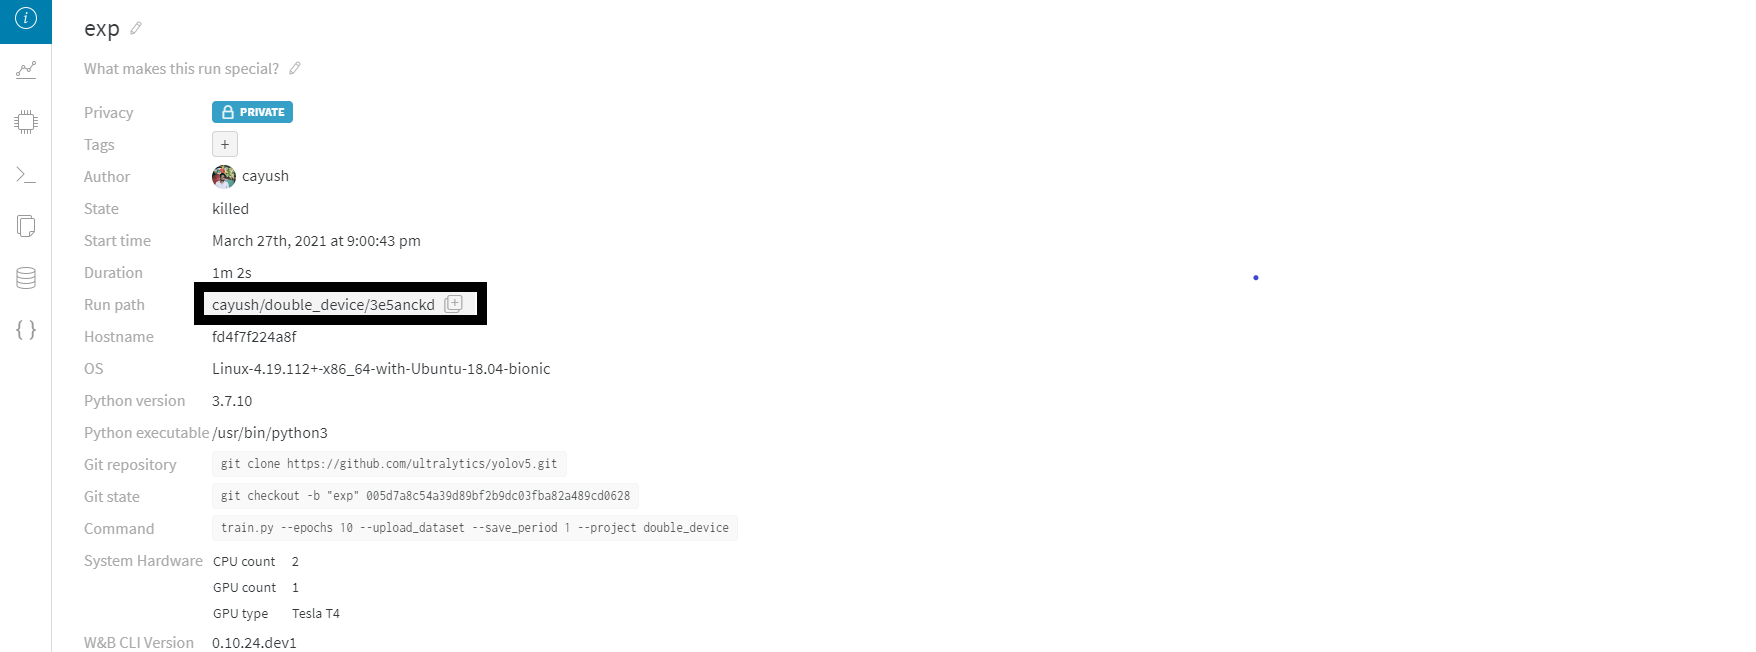


In [ ]:
%cd /content/main
crashed_run_path = "lannguyen/food-detection-yolov5/33v2v36u"  # paste your path here

!python train.py --resume wandb-artifact://{crashed_run_path} # --batch-size 8 
# set batch-size to 8 when training with Yolov5x 

/content/main
train: weights=yolov5s.pt, cfg=, data=data/coco128.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=300, batch_size=16, imgsz=640, rect=False, resume=wandb-artifact://lannguyen/food-detection-yolov5/33v2v36u, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.0-218-g7539cd7 torch 1.10.0+cu111 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_

In [1]:
!curl -L “https://app.roboflow.com/ds/r7gxbFXmxO?key=P4RWGf2c2R” > roboflow. zip; unzip roboflow. zip; rm roboflow.zip

curl: (3) Failed to convert “https to ACE; string contains a disallowed character

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0curl: (6) Could not resolve host: zip
Archive:  roboflow.
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of roboflow. or
        roboflow..zip, and cannot find roboflow..ZIP, period.
rm: cannot remove 'roboflow.zip': No such file or directory
